# Capstone 2 - Supervised Learning
## Predicting House Prices with Regression Models

Welcome! <br>
This data set is an open source insight into the housing market in Ames Iowa. Our goal is to help customers understand the many variables that might impact the value of a home. When purchasing or selling property, real estate agents frequently make comprehensive (comps) reviews of the nearby area and recent activity to justify the value of any given listing. These comps take a lot of effort and much of the information is hidden away in private systems, only accessible by the agents. <br>

This is where we step in. Using public data, our customers can review the trends of any home in the area to gain insight into the control that drive home value up and down. This will result in a more confident and well-informed decision, no matter which side of the desk they're sitting on. <br> 

Try not to go cross-eye by the boring pieces of this walk through. In addition to the insight gained by the end-product, there are a lot of technical details that need to be hashed out. Being open source data, we can be sure there will be nulls and outliers, which may be the easy stuff!

Let's begin!

In [1]:
# Import dataframe/number packages
import pandas as pd
import numpy as np

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Import stat packages
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import norm, skew #for some statistics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

# regression models/model helpers
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

# Shutup Warnings!
import warnings
warnings.filterwarnings('ignore')

# pd set options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.reset_option('display.float_format')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

## Load Data

In [2]:
df_houseprices = pd.read_csv('house_prices.csv')
df_houseprices.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   
5   6          50       RL       85.000    14115   Pave   NaN      IR1   
6   7          20       RL       75.000    10084   Pave   NaN      Reg   
7   8          60       RL          nan    10382   Pave   NaN      IR1   
8   9          50       RM       51.000     6120   Pave   NaN      Reg   
9  10         190       RL       50.000     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   
5       0.000        TA        TA       Wood       Gd       TA           No   
6     186.000        Gd        TA      PConc       Ex       TA           Av   
7     240.000        TA        TA     CBlock       Gd       TA           Mn   
8       0.000        TA        TA     BrkTil       TA       TA           No   
9       

## Data Exploration
Let's learn a bit about the data at a high level.

In [3]:
df_houseprices.shape

(1460, 81)

In [4]:
df_houseprices.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
df_houseprices.describe(include = 'all')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley  \
count  1460.000    1460.000     1460     1201.000   1460.000   1460    91   
unique      nan         nan        5          nan        nan      2     2   
top         nan         nan       RL          nan        nan   Pave  Grvl   
freq        nan         nan     1151          nan        nan   1454    50   
mean    730.500      56.897      NaN       70.050  10516.828    NaN   NaN   
std     421.610      42.301      NaN       24.285   9981.265    NaN   NaN   
min       1.000      20.000      NaN       21.000   1300.000    NaN   NaN   
25%     365.750      20.000      NaN       59.000   7553.500    NaN   NaN   
50%     730.500      50.000      NaN       69.000   9478.500    NaN   NaN   
75%    1095.250      70.000      NaN       80.000  11601.500    NaN   NaN   
max    1460.000     190.000      NaN      313.000 215245.000    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460     1460.000     1460.000   
unique          9          8        5          8          nan          nan   
top          Norm       Norm     1Fam     1Story          nan          nan   
freq         1260       1445     1220        726          nan          nan   
mean          NaN        NaN      NaN        NaN        6.099        5.575   
std           NaN        NaN      NaN        NaN        1.383        1.113   
min           NaN        NaN      NaN        NaN        1.000        1.000   
25%           NaN        NaN      NaN        NaN        5.000        5.000   
50%           NaN        NaN      NaN        NaN        6.000        5.000   
75%           NaN        NaN      NaN        NaN        7.000        6.000   
max           NaN        NaN      NaN        NaN       10.000        9.000   

        YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count    1460.000      1460.000      1460     1460        1460        1460   
unique        nan           nan         6        8          15          16   
top           nan           nan     Gable  CompShg     VinylSd     VinylSd   
freq          nan           nan      1141     1434         515         504   
mean     1971.268      1984.866       NaN      NaN         NaN         NaN   
std        30.203        20.645       NaN      NaN         NaN         NaN   
min      1872.000      1950.000       NaN      NaN         NaN         NaN   
25%      1954.000      1967.000       NaN      NaN         NaN         NaN   
50%      1973.000      1994.000       NaN      NaN         NaN         NaN   
75%      2000.000      2004.000       NaN      NaN         NaN         NaN   
max      2010.000      2010.000       NaN      NaN         NaN         NaN   

       MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452    1452.000      1460      1460       1460     1423   
unique          4         nan         4         5          6        4   
top          None         nan        TA        TA      PConc       TA   
freq          864         nan    

In [6]:
df_houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# determine which columns are likely categorical vs continuous variables
# look at the lower numbers to recognize potential categorical variables
df_houseprices.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

Painless so far. We already learned the following:
- There are multiple types of data (object, int, float)
- There are nulls
- Certain to stumble on to skewed variables
- Ranges of data vary wildly
- Dates of sales activity are from 2006 - 2010

### Analyzing Target Variable (SalePrice)

In [8]:
df_houseprices['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

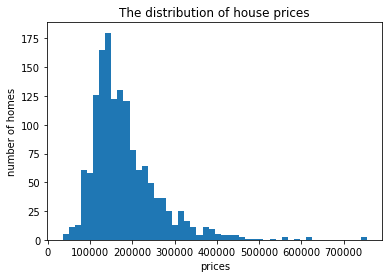

In [9]:
plt.hist(df_houseprices.SalePrice, bins = 50)
plt.title("The distribution of house prices")
plt.xlabel("prices")
plt.ylabel("number of homes")
plt.show()

In [10]:
#skewness and kurtosis
print("Skewness: %f" % df_houseprices['SalePrice'].skew())
print("Kurtosis: %f" % df_houseprices['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- The house prices distribution seem to be skewed to the right. The skewness and Kurtosis values of 1.88 and 6.55, respectively, support that this data is heavily skewed to the right. 

Let's see how our target relates with other features.

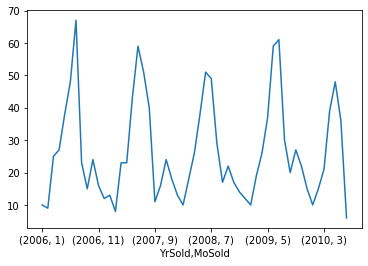

In [11]:
df_houseprices.groupby(['YrSold', 'MoSold'])['SalePrice'].count().plot()

- The dates of homes sold range from January 2006 to July 2010. 
- As one would expect from anecdotal information, the frequency of house sales increase in the spring/summer months. Each season is followed up with a secondary, less active peak in house sales.

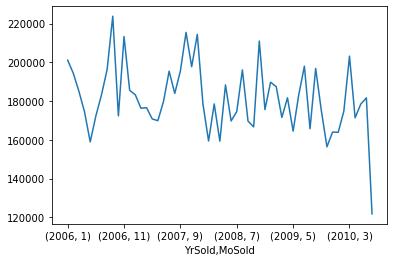

In [12]:
df_houseprices.groupby(['YrSold', 'MoSold'])['SalePrice'].mean().plot()

- The general trend of house prices appear to decline throughout this dataset.

Text(0.5, 1.0, 'Correlation with SalePrice: 0.7086')

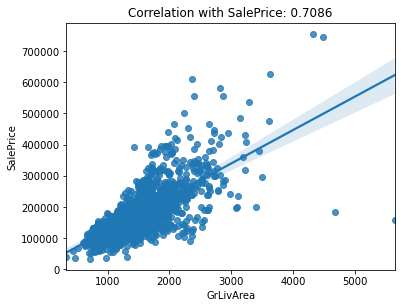

In [13]:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(231); sns.regplot(x='GrLivArea', y='SalePrice', data=df_houseprices)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_houseprices.GrLivArea.corr(df_houseprices['SalePrice'])))

- This graph supports the common instinct that suggests that larger homes are more expensive than smaller homes. Since this is not a perfect 1 to 1 correlation (R-square of 0.708), we can expect there are other features that influence the home price.

Let's make a quick pair of lists, numeric and non-numeric

In [3]:
num_cols = df_houseprices.select_dtypes(['int64', 'float64']).columns
print("The number of numerical columns is {}".format(len(num_cols)))

non_numeric_columns = df_houseprices.select_dtypes(['object']).columns
print("The number of NON-numeric columns is {}".format(len(non_numeric_columns)))

The number of numerical columns is 38
The number of NON-numeric columns is 43


How does our target relate with categorical (non-numeric) data?

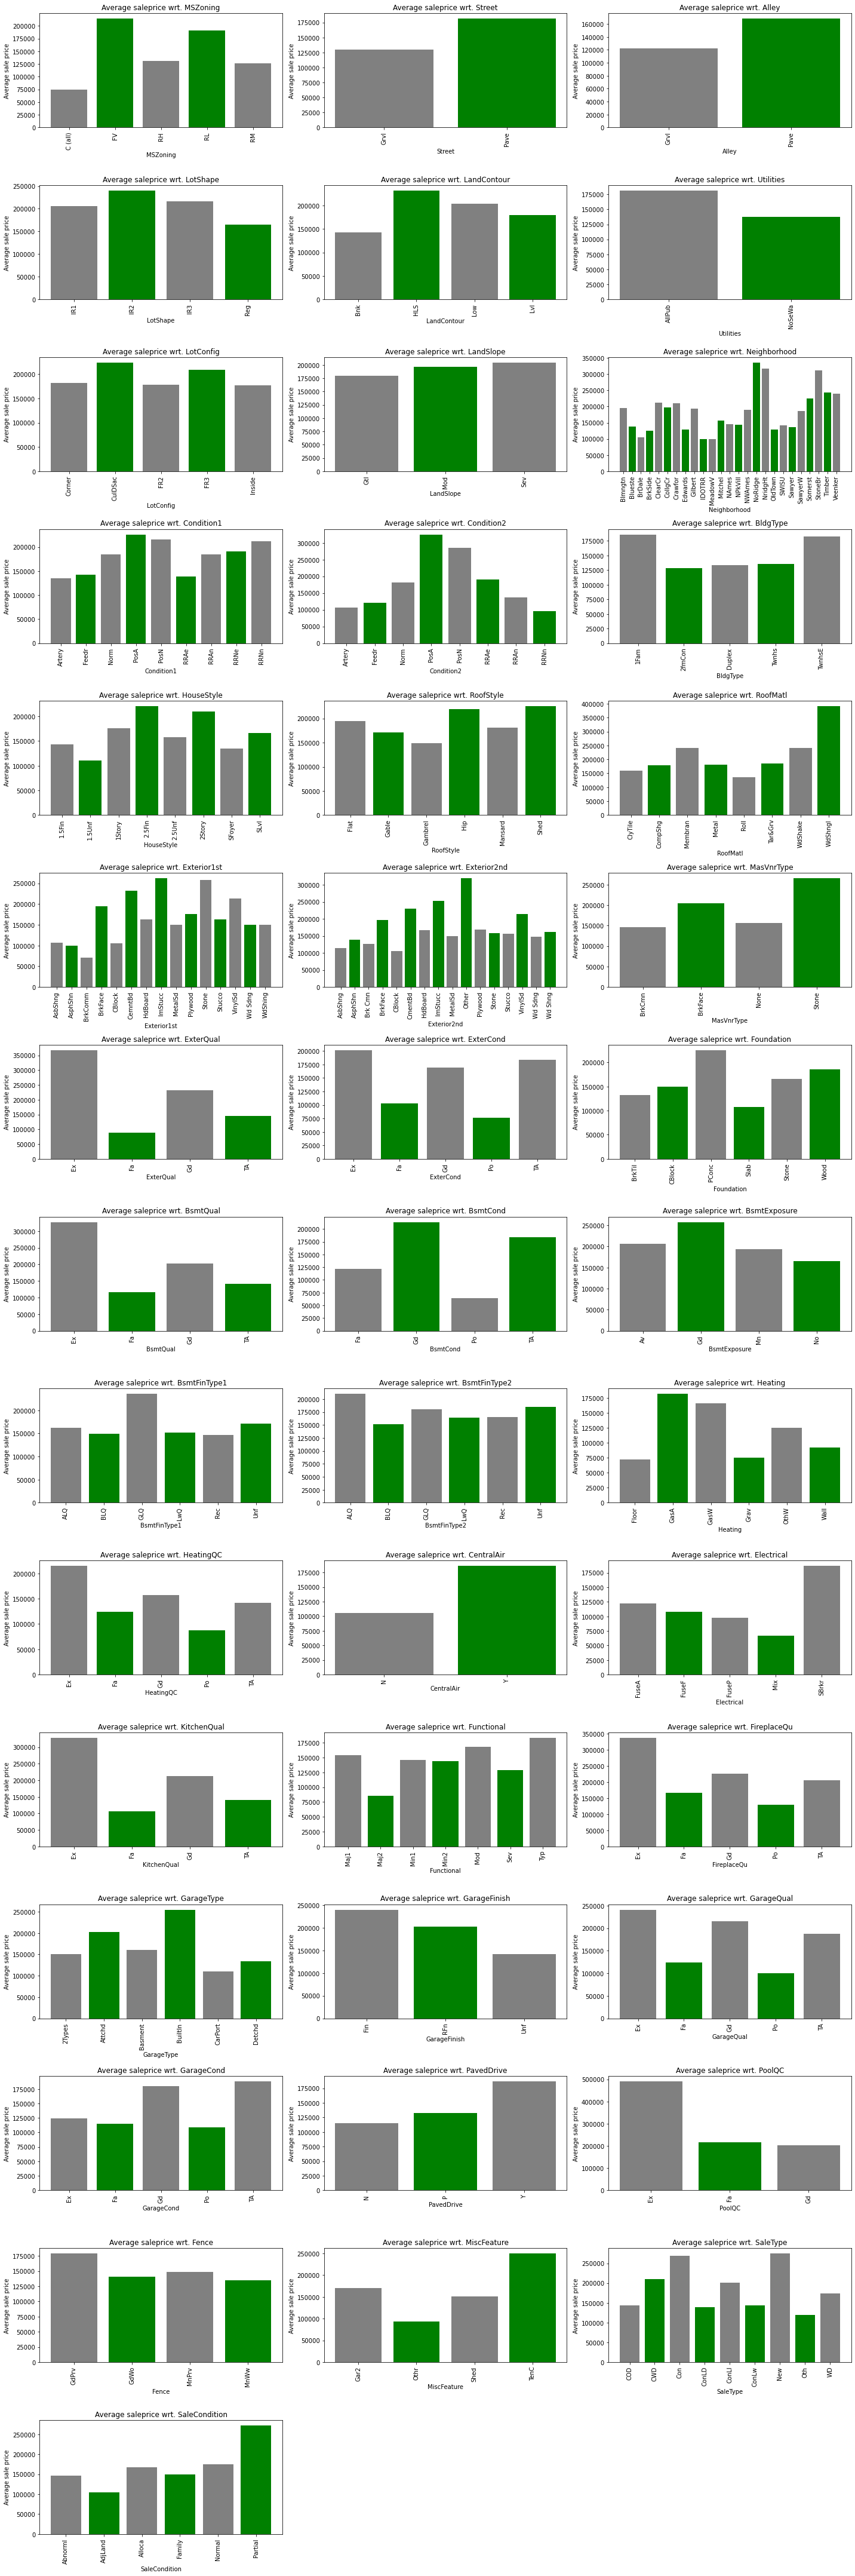

In [15]:
plt.figure(figsize=(20,60))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(15,3,index+1)
    plt.bar(df_houseprices.groupby(column)["SalePrice"].mean().index, df_houseprices.groupby(column)["SalePrice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

- The above suite of graphs represent the average sale price against each category. 
- Price seems to be impacted by neighborhoods. This might be useful to those new to the area.
- Homes with central air seem to have higher prices on average than homes without central air.
- Neighboorhood appears to have some impact to price as well.

Let's dig into a few categorical variables and see if we can learn anything new.

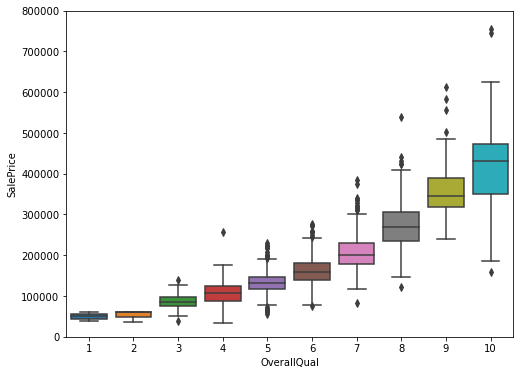

In [16]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- Overall quality seems to have strong relationship with sale price. 
- The average, base, and ceiling of house prices go up in general with each higher quality rank.
- This feature may be important to home buyers to support whether they are getting a good value for their purchase.
- Conversely, home sellers can use this information to support their asking price.

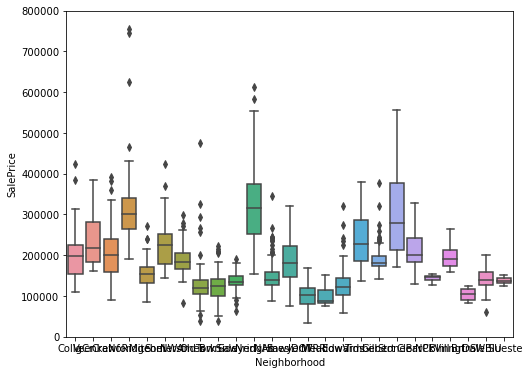

In [17]:
#box plot Neighborhood/saleprice
var = 'Neighborhood'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- This graph might look random to most people. However, if we're trying to help someone focus in areas in their price range, then we can use this information as a good starting point. 
- We can also deduce bargains in a given neighborhood.

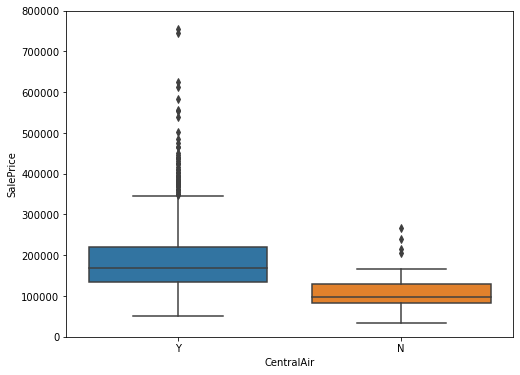

In [18]:
#box plot CentralAir/saleprice
var = 'CentralAir'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- Homes with central air not only are more expensive on average but their ceiling of pricing is higher. 
- This information can come in handy if someone is looking for investments. 
- Simply looking at central air can be misleading on its own. Keep in mind that there are other features, like neighborhood, that can complicate the story. 

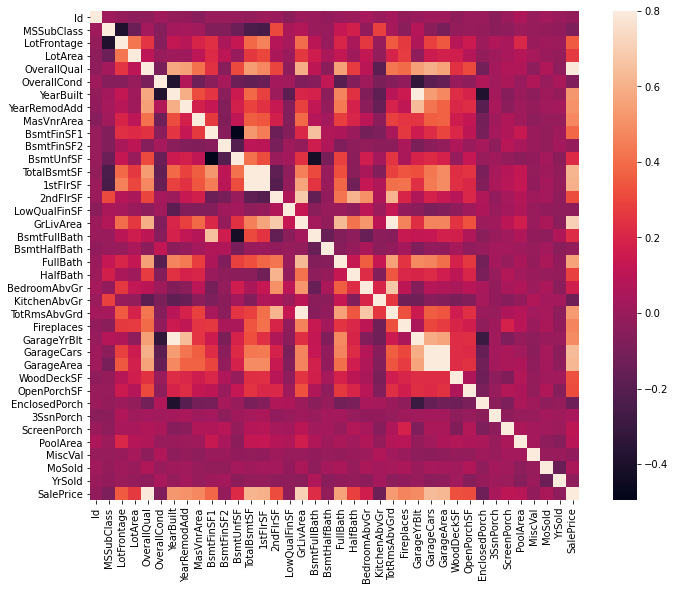

In [19]:
#correlation matrix
corrmat =  df_houseprices.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- This heatmap represents the correlation matrix of numeric data.
- Brighter colors indicate higher correlation coefficents and the cooler colors indicate lower correlation coefficients.
- Take note of brightest colors: GarageYrBuilt-YearBuilt; TotalBsmtSF-1stFlrSF; TotRmsAbvGrd-GrLivingArea; and SalePrice-OverallQual
- These variable pairs appear to be experiencing strong, colinear relationships. This will be something to be aware of when selecting features of importance further down the work flow.

Pairplots can help us visualize bivariate relationships, which is helpful to identify multi-colinearity.

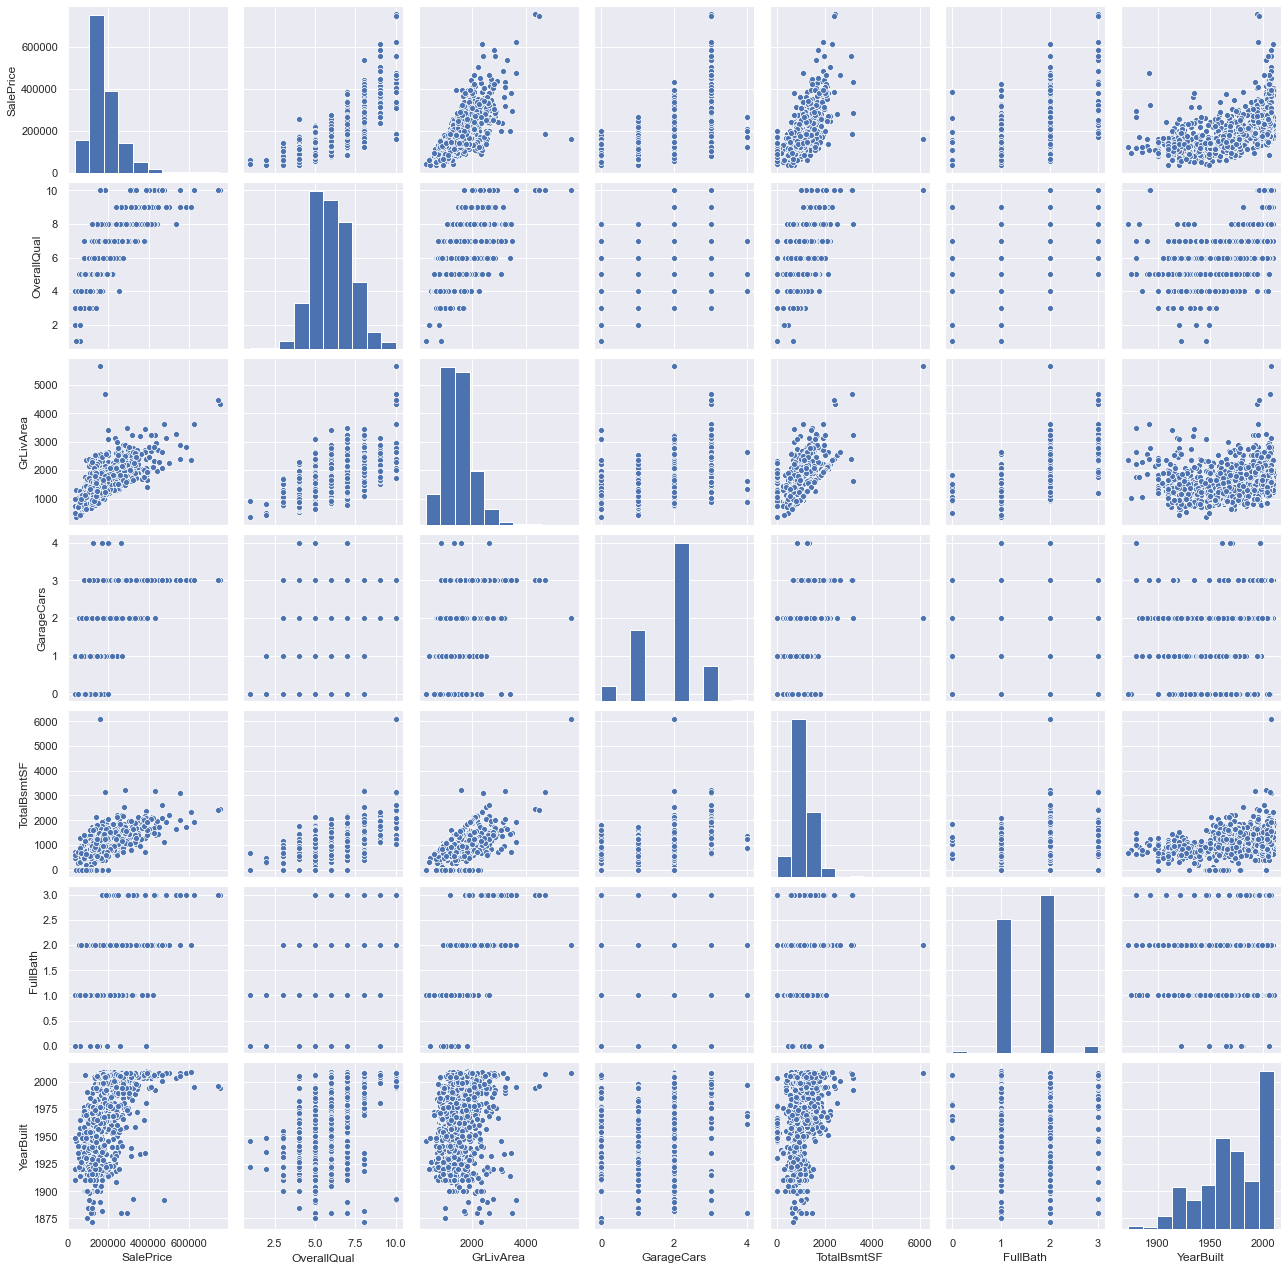

In [20]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_houseprices[cols], size = 2.5)
plt.show();

- These features have positive relationships with SalePrice. 
- Features like GarageCars and OverallQual loosely correlate but the general trend is still positive.
- Pay close attention to TotalBsmtSF vs GrLivArea. There are bounding dots that are strongly lined up. Thinking about this further, it's not typical for the basement to cover a larger area than the main home. In the case of upward line, we can deduce that the basement was exactly the same size in area as the main home. Where the line of dots is flat on the x-axis, it is likely that these homes did not have a basement, so the basement sf was reported as zero.
- OverQual appears to have positive relationships with other features, in addition to SalePrice. This could raise a flag for multicolinearity potential.

## Data Cleanup - Nulls

One of the insights we learned about the data is that nulls exist. Let's explore them and treat them accordingly.

In [4]:
# create new dataframe to maintain original version
df_houseprices_2 = df_houseprices.copy()

First thing to do is examine where the nulls exist. The following code breaks down the total and percentage of nulls by feature.

In [5]:
# Count how many nulls there are per column
total_nulls = df_houseprices_2.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

# Observe the percentage of nulls in each column
percent_nulls = df_houseprices_2.isna().sum()* 100 / len(df_houseprices_2)
percent_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)
print('------------------------\npercent nulls per column')
print(percent_nulls)

total nulls per column
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope

WOW! 99% of the PoolQC is nulled out. It actually makes a good deal of sense. Not many homes actually have pools, thereby not requiring information about said non-existent pool. Good thing we didn't just try and remove all nulls at the beginning! <br>

We have different data types, we can't simply take the average of them. <br>

Also, since we don't yet know the nature of the nulls, we should hold off from our impulse to delete them. The nulls may provide information.

In [6]:
# make unique columns for object and numeric dtypes
num_cols = df_houseprices_2.select_dtypes(exclude = object).columns
word_cols = df_houseprices_2.select_dtypes(include = object).columns

In [7]:
# Find columns which has null values and data type object
fill_na_word_columns = []
for column_name in df_houseprices_2.columns:
    if df_houseprices_2[column_name].isnull().any() and df_houseprices_2[column_name].dtype==object:
        fill_na_word_columns.append(column_name)
        
print(fill_na_word_columns)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
# Find columns which has null values and data numerical data
fill_na_numeric_columns = []
for column_name in num_cols:
    if df_houseprices_2[column_name].isnull().any():
        fill_na_numeric_columns.append(column_name)
        
print(fill_na_numeric_columns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


There are WAY fewer numeric columns with nulls than object data types. Let's start with the numeric columns since there are only 3.

In [9]:
df_houseprices_2[['LotFrontage', 'LotConfig', 'LotArea', 'MasVnrArea', 'MasVnrType', 'GarageYrBlt','GarageCars']].sample(20)

LotFrontage LotConfig  LotArea  MasVnrArea MasVnrType  GarageYrBlt  \
92         80.000    Inside    13360       0.000       None     1921.000   
115        34.000    Corner     3230    1129.000    BrkFace     1999.000   
1064          nan   CulDSac    11000     200.000    BrkFace     1966.000   
67         72.000    Inside    10665     167.000    BrkFace     2003.000   
950        60.000    Inside     7200       0.000       None     1980.000   
848        75.000    Inside    45600       0.000       None     1908.000   
311        50.000    Inside     8000       0.000       None     1948.000   
1060       41.000    Inside     4920       0.000       None     2001.000   
965        65.000    Inside    10237       0.000       None     2005.000   
95            nan    Corner     9765      68.000    BrkFace     1993.000   
923        50.000    Inside     8012       0.000       None     1993.000   
458           nan    Inside     5100       0.000       None     1925.000   
27         98.000    Inside    11478     200.000      Stone     2008.000   
968        50.000    Inside     5925       0.000       None          nan   
617        59.000    Corner     7227       0.000       None     1962.000   
142        71.000    Corner     8520       0.000       None     2000.000   
1419          nan    Inside    16381     312.000    BrkFace     1969.000   
1415       51.000    Inside     3635     130.000    BrkFace     2007.000   
333        59.000       FR3     8198     146.000      Stone     2004.000   
694        51.000    Corner     6120       0.000       None     1995.000   

      GarageCars  
92             2  
115            2  
1064           2  
67             2  
950            2  
848            2  
311            1  
1060           2  
965            2  
95             2  
923            2  
458            1  
27             3  
968            0  
617            2  
142            2  
1419           2  
1415           3  
333            2  
694            2

- LotFrontage doesn't appear to follow much of trend based on the lot configuration or area. What about neighborhoods?
- MasVnrArea and GarageYrBlt tell a different story. These both display nulls when the condition does not exist. In this case, we will simply replace the nulls with zeros.

In [10]:
# Explore LotFrontage
# Continuous variable... is there any relationship with neighborhood?
df_houseprices_2.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn           47.143 43.000    14
Blueste           24.000 24.000     2
BrDale            21.562 21.000    16
BrkSide           57.510 52.000    51
ClearCr           83.462 80.000    13
CollgCr           71.683 70.000   126
Crawfor           71.805 74.000    41
Edwards           68.217 65.500    92
Gilbert           79.878 65.000    49
IDOTRR            62.500 60.000    34
MeadowV           27.800 21.000    15
Mitchel           70.083 73.000    36
NAmes             76.462 73.000   186
NPkVill           32.286 24.000     7
NWAmes            81.289 80.000    45
NoRidge           91.879 91.000    33
NridgHt           81.882 88.500    76
OldTown           62.789 60.000   109
SWISU             58.913 60.000    23
Sawyer            74.438 71.000    48
SawyerW           71.500 66.500    50
Somerst           64.667 73.500    78
StoneBr           62.700 61.500    20
Timber            80.133 85.000    30
Veenker           59.714 68.000     7

- The mean and median are quite close together. 
- Let's fill the nulls in with median to keep the numberic values similar.
- Grouped by Neighborhood

In [11]:
df_houseprices_2["LotFrontage"] = df_houseprices_2.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
# fill nulls with zeros for GarageYrBlt and MasVnrArea
for col in fill_na_numeric_columns:
    df_houseprices_2[col].fillna(0, inplace=True)

These categorical variables represent conditional observations. The nulls are not being treated as reporting errors but rather lacking the features necessary to describe. Therefore, "None" will replace the nulls.

In [13]:
# Fill "None" in object columns to replace nulls
for col_name in fill_na_word_columns:
    df_houseprices_2[col_name].fillna("NONE",inplace=True)

Double checking our null counts...

In [14]:
# double check to see if any nulls exist after replacing nulls with 0s
# Count how many nulls there are per column
total_nulls = df_houseprices_2.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)

total nulls per column
SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPo

Huzzah! Nulls are gone.

### Data cleanup - Outliers
### Univariate Analysis

Let's quickly run through the numeric columns using univariate methods. It's possible we may see large outliers in some variables. Outliers are also a bit tricky. We'll need to evaluate the data using univariate and bivariate methods before making a move we might regret.

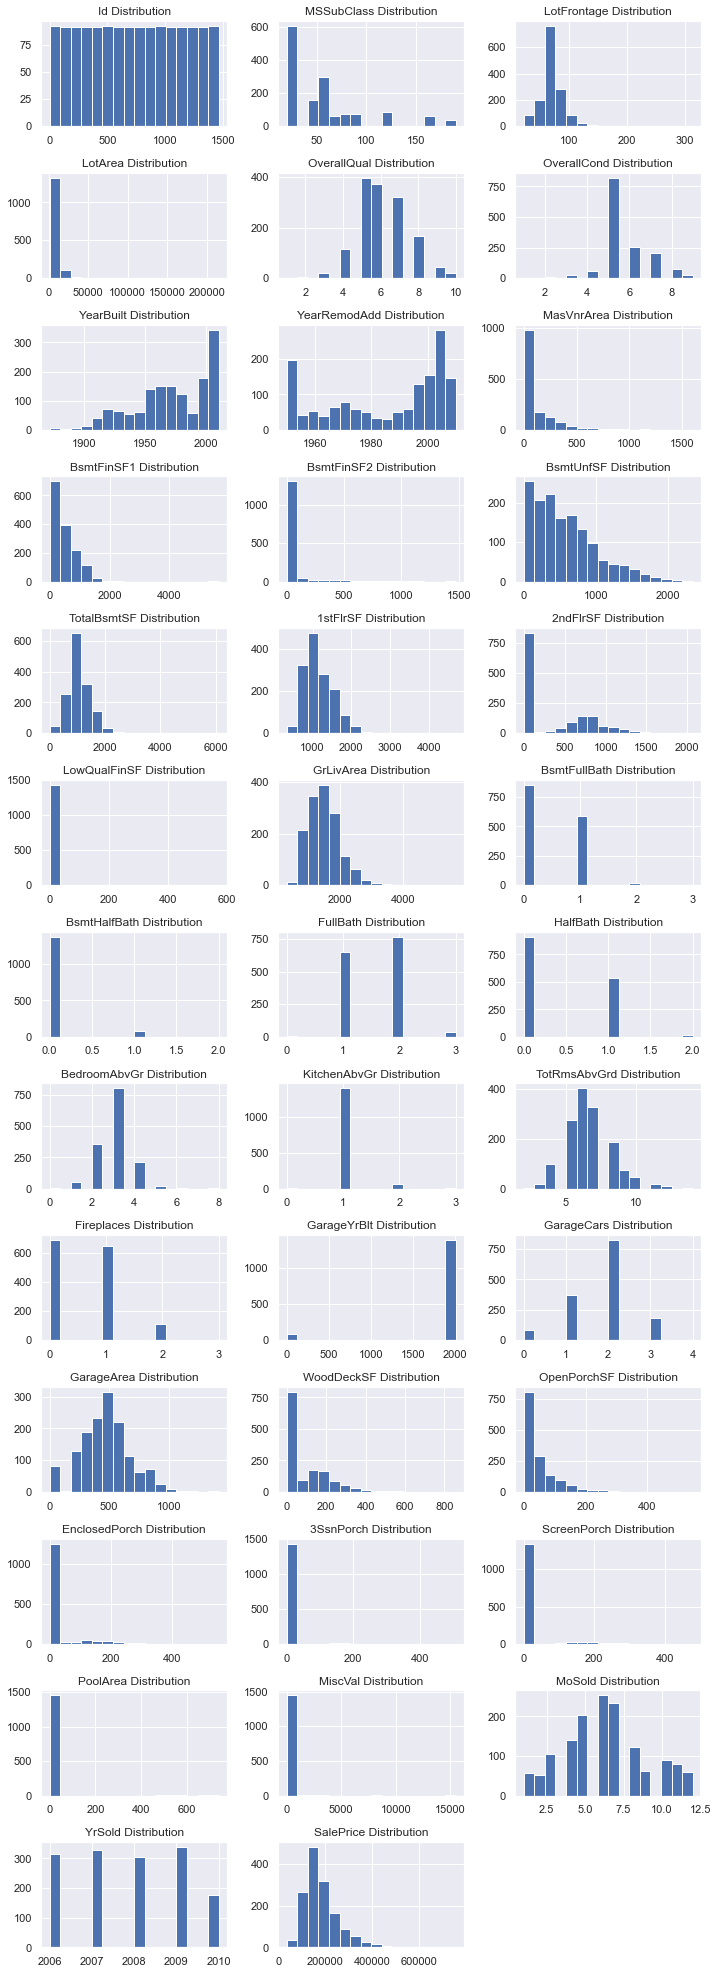

In [31]:
# Univariate visualization without having to manually plot each graph

def draw_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(10, 80))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=16,ax=ax)
        ax.set_title(var_name + " Distribution")
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_houseprices_2, num_cols, len(num_cols), 3)

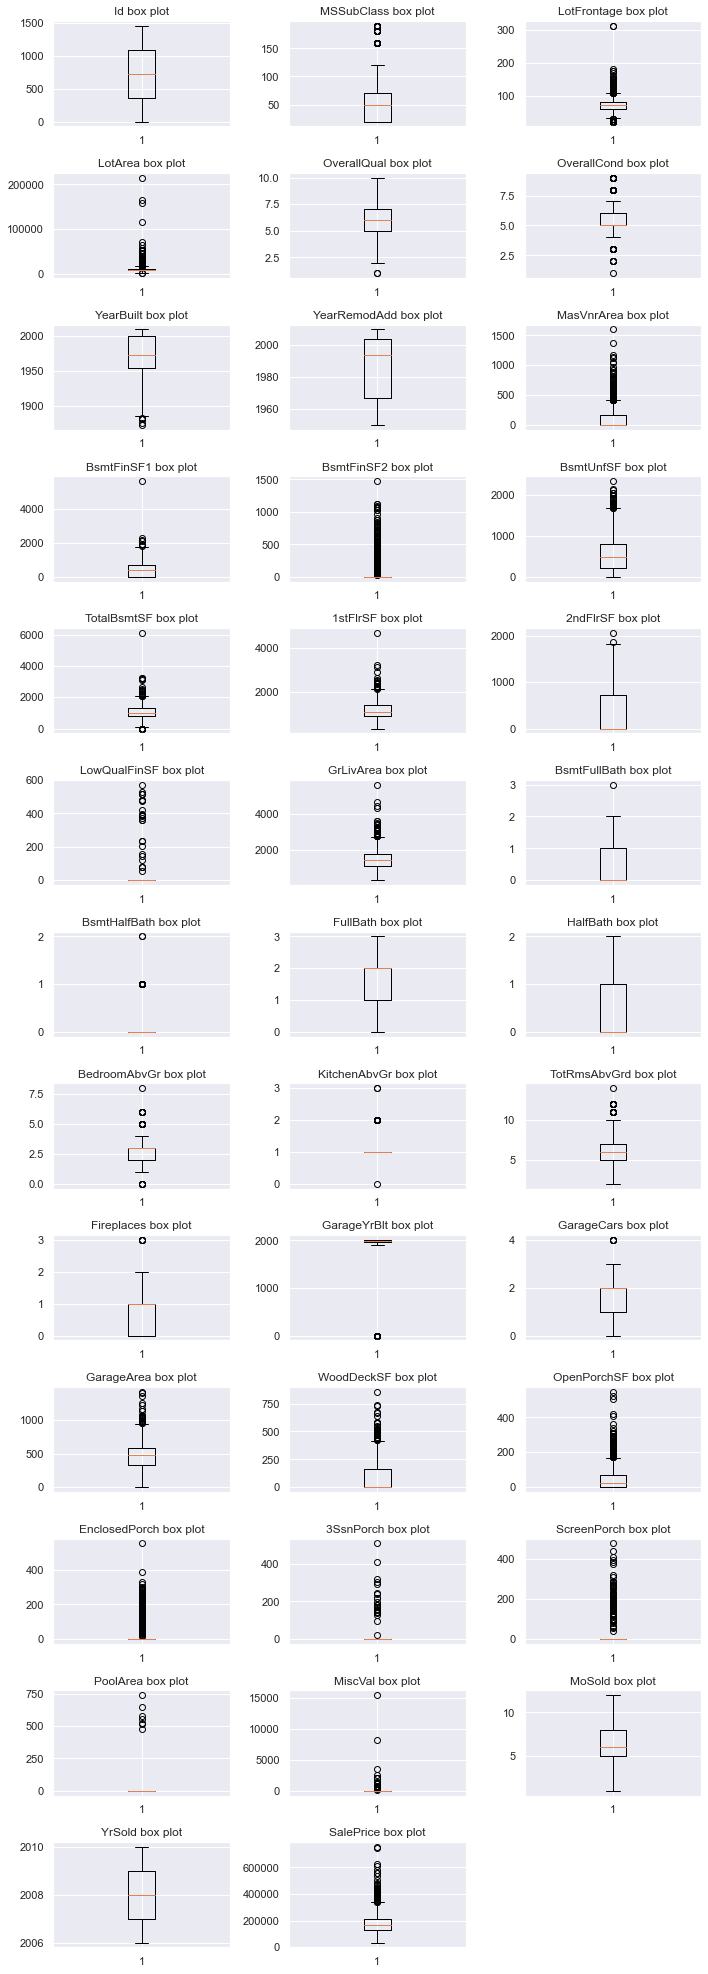

In [32]:
# box plots of to viualize outliers

def draw_box(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(10, 80))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.boxplot(df[var_name])
        ax.set_title(var_name + ' box plot')
    fig.tight_layout()
    plt.show()
    
draw_box(df_houseprices_2, num_cols, len(num_cols), 3)

In [33]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in num_cols:
    q75, q25 = np.percentile(df_houseprices_2[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df_houseprices_2[variable] > max_val) | 
                                                                                           (df_houseprices_2[variable] < min_val))[0])),len((np.where((df_houseprices_2[variable] > max_val) | 
                                                                                           (df_houseprices_2[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Id : 0 and 0.0
Number of outliers and percentage of it in MSSubClass : 103 and 5.183694011071967
Number of outliers and percentage of it in LotFrontage : 106 and 5.334675390035229
Number of outliers and percentage of it in LotArea : 69 and 3.4725717161550076
Number of outliers and percentage of it in OverallQual : 2 and 0.10065425264217413
Number of outliers and percentage of it in OverallCond : 125 and 6.290890790135883
Number of outliers and percentage of it in YearBuilt : 7 and 0.3522898842476095
Number of outliers and percentage of it in YearRemodAdd : 0 and 0.0
Number of outliers and percentage of it in MasVnrArea : 98 and 4.9320583794665325
Number of outliers and percentage of it in BsmtFinSF1 : 7 and 0.3522898842476095
Number of outliers and percentage of it in BsmtFinSF2 : 167 and 8.40463009562154
Number of outliers and percentage of it in BsmtUnfSF : 29 and 1.4594866633115249
Number of outliers and percentage of it in TotalBsmtSF : 61

- At the surface, can see that there are some potential outliers. 
- Looking further, we can also acknowledge that some features don't have outliers as much as a lack of data (large count of zero values). So, anything reported as a positive value appears on the box plots as an outlier.
- Some of these outliers also don't look extreme and many would be best left alone. 
- Before making any changes, lets review the variables in another way... bivariate analysis.

### Bivariate Analysis

We saw that many features might have outliers using univariate detection methods. What can we determine when we crossplot these features against the target?

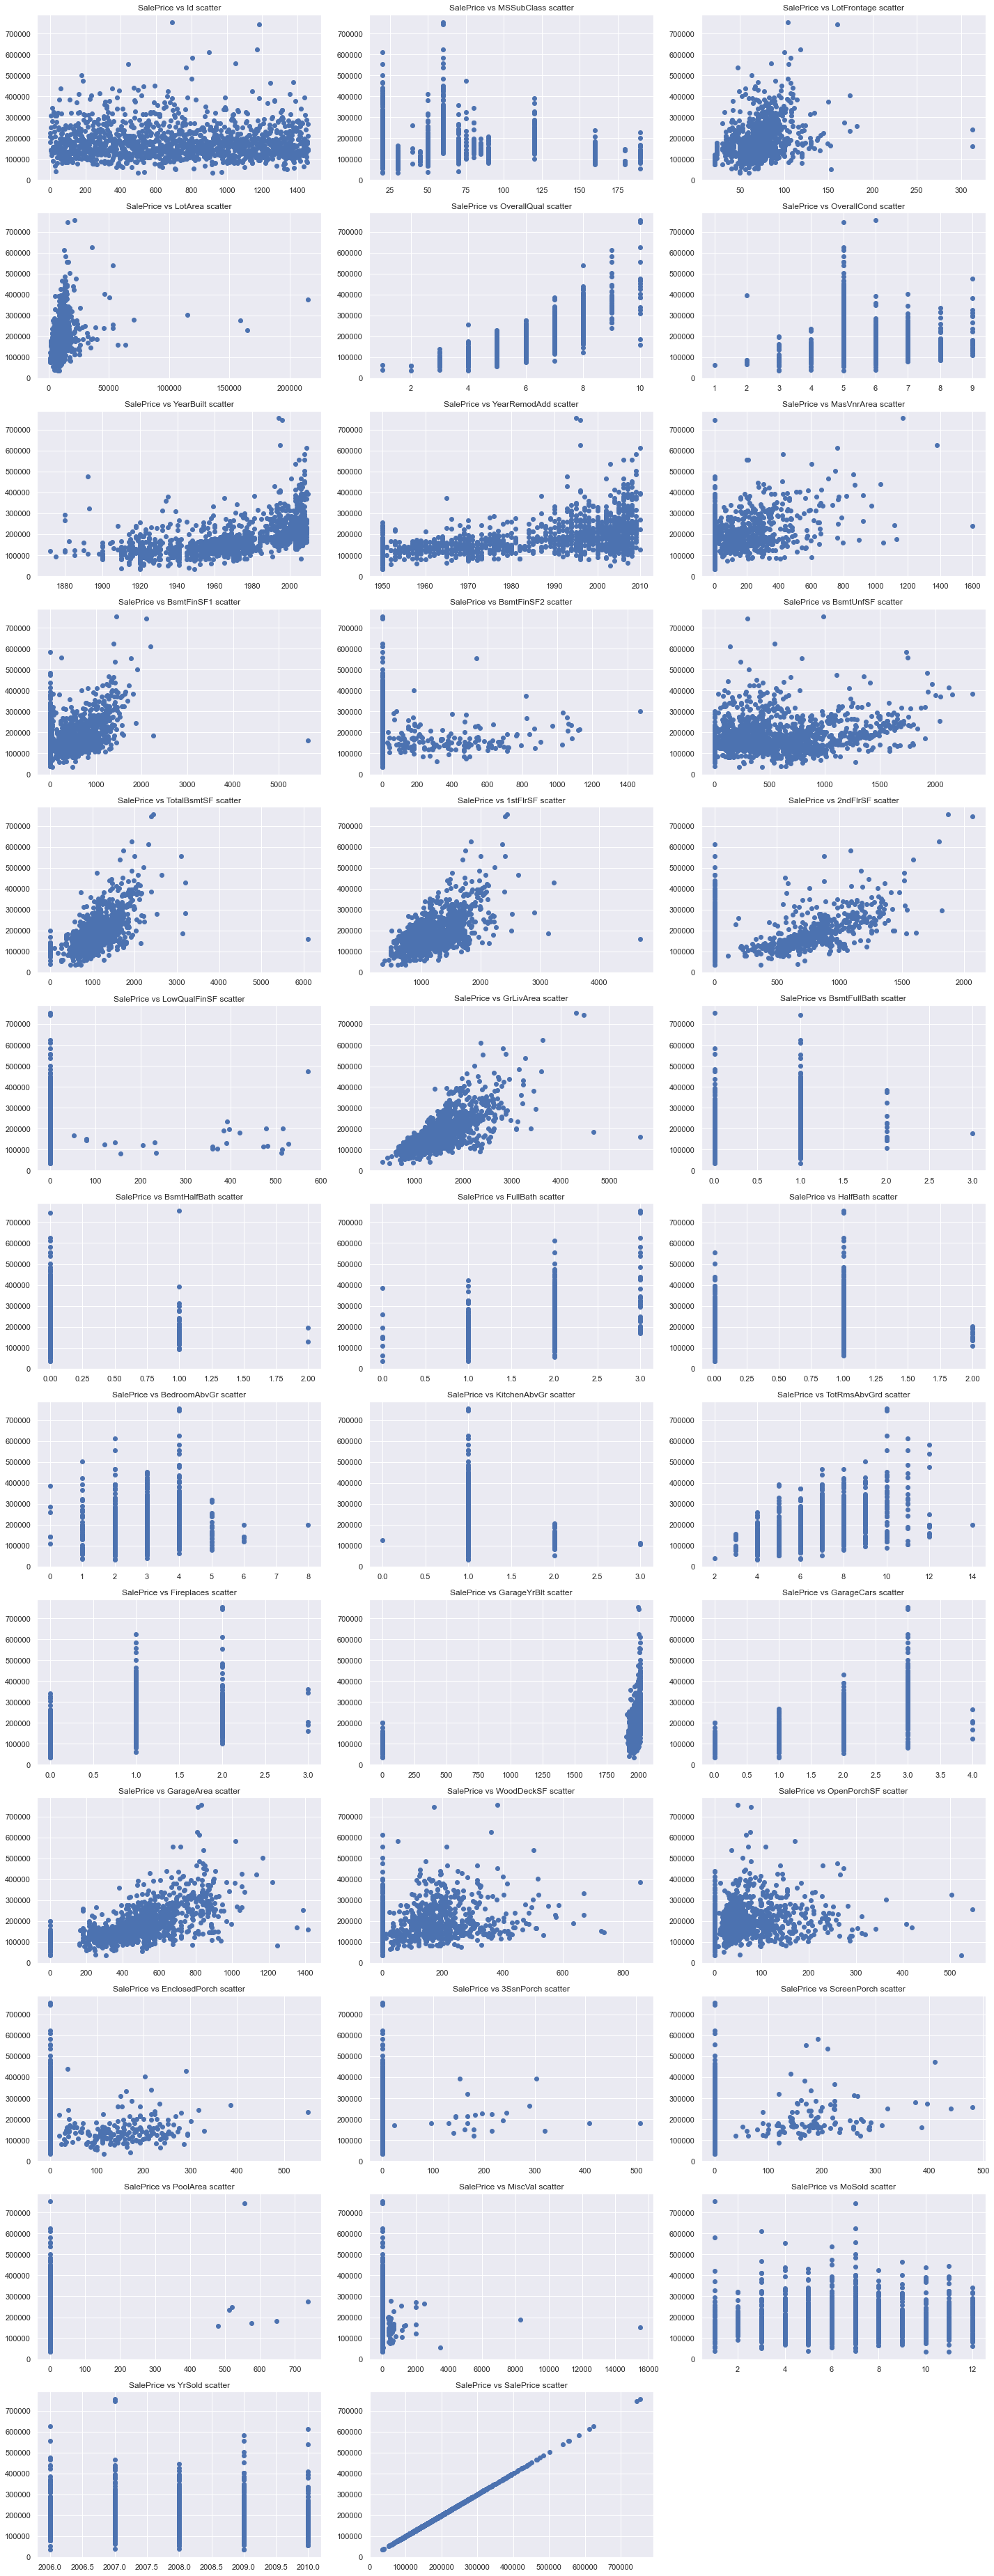

In [34]:
def draw_scatter(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize = (20,150))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        ax.scatter(df[var_name], df['SalePrice'])
        ax.set_title('SalePrice vs ' + str(var_name) + " scatter")
    fig.tight_layout()
    plt.show()
    
draw_scatter(df_houseprices_2, num_cols, len(num_cols), 3)

- The SalePrice vs LotArea scatter plot stands out. 4 data points are far off to the right of the bulk of the data.
- We could attribute this observation to homes that are cheaper per square foot compared to the other homes.
- However, these data points don't help explain the general trend of the data. Let's give them the boot!

In [15]:
# preserve previous changes by creating new dataframe
df_houseprices_3 = df_houseprices_2.copy()

In [16]:
#deleting points
df_houseprices_2[['Id','SalePrice', 'LotArea']].sort_values(by = 'LotArea', ascending = False)
df_houseprices_3 = df_houseprices_3.drop(df_houseprices_3[df_houseprices_3['Id'].isin([314, 336, 250, 707])].index)

Those data points are confirmed to be removed. There are still some data points that look like they are also outliers but they are still loosely grouped around the bulk of the data.

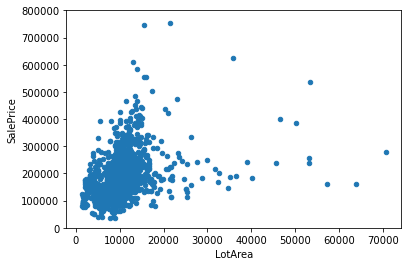

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'LotArea'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- So what? We removed a few data points from 1 observation. 
- Did this impact any other variable?
- Let's review another cross plot that appeared to have an outlier against SalePrice. 

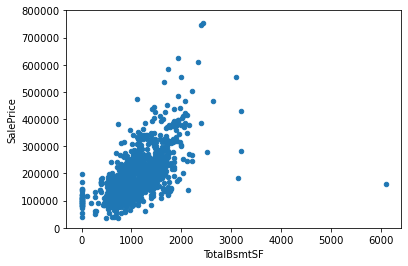

In [18]:
#bivariate analysis SalePrice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


- Comparing this TotalBsmtSF vs SalePrice scatter plot with the original, we can see that even some of these would-be outliers were removed.
- There is still has an outlier all out by itself that we need to remove.

In [19]:
df_houseprices_2[['Id','SalePrice', 'TotalBsmtSF']].sort_values(by = 'TotalBsmtSF', ascending = False)
df_houseprices_3 = df_houseprices_3.drop(df_houseprices_3[df_houseprices_3['Id'] == 1299].index)

- One last sanity check... did removing that outlier improve any other feature?

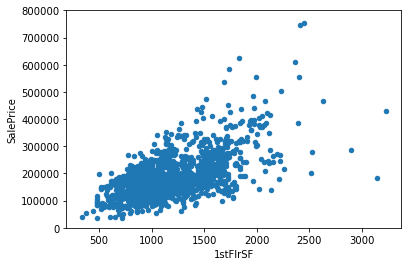

In [20]:
#bivariate analysis saleprice/grlivarea
var = '1stFlrSF'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- YUP!! This scatter plot was cleaned up by removing the previous data point.

Removing only the outliers on variables where the data makes sense to do so. If we normalize everything, then we run the risk of losing integrity of the data because many homes simply will not have the same feature sets as others. Also, some variables have a very few inputs and the majority of the data is 0. Removing assumed outliers without considering these implications can remove possibly helpful features. 

The next question is whether we want to transform, remove, or maintain data. 

In [21]:
df_houseprices_3.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave  NONE      Reg   
1   2          20       RL       80.000     9600   Pave  NONE      Reg   
2   3          60       RL       68.000    11250   Pave  NONE      IR1   
3   4          70       RL       60.000     9550   Pave  NONE      IR1   
4   5          60       RL       84.000    14260   Pave  NONE      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        NONE   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Let's begin with our target variable. SalePrice was established to be skewed to the right. One of the assumptions of linear regression models is that the target must be normally distributed. 

Skewness: 1.897060
Kurtosis: 6.636904


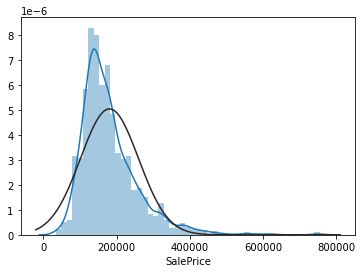

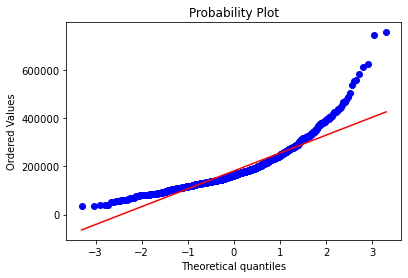

In [22]:
#histogram and normal probability plot
sns.distplot(df_houseprices_3['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_houseprices_3['SalePrice'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_houseprices_3['SalePrice'].skew())
print("Kurtosis: %f" % df_houseprices_3['SalePrice'].kurt())

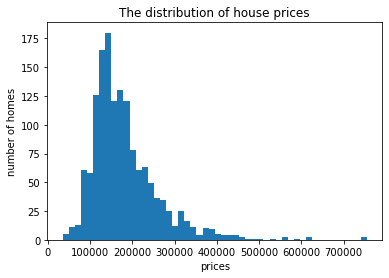

In [23]:
plt.hist(df_houseprices_3['SalePrice'], bins = 50)
plt.title("The distribution of house prices")
plt.xlabel("prices")
plt.ylabel("number of homes")
plt.show()

SalePrice is definitely skewed to the right and doesn't quite line up in the probability plot. Since this data is skewed, we need to normalize it. Winsorizing will just cap the data but a log transformation will correct the bulk of skewness and rescale the data for us so that it's more relatable to the features. This will become important down the road.

In [24]:
#applying log transformation
df_houseprices_3['SalePrice'] = np.log(df_houseprices_3['SalePrice']) 

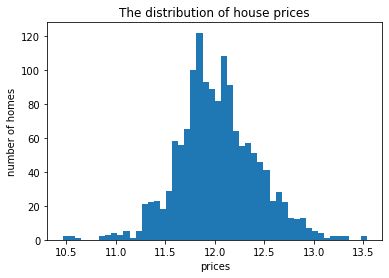

In [25]:
plt.hist(df_houseprices_3['SalePrice'], bins = 50)
plt.title("The distribution of house prices")
plt.xlabel("prices")
plt.ylabel("number of homes")
plt.show()

Skewness: 0.123717
Kurtosis: 0.826289


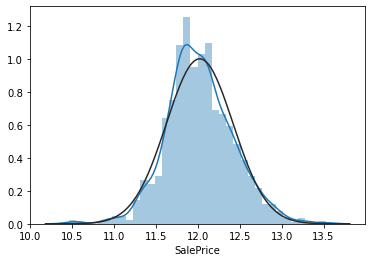

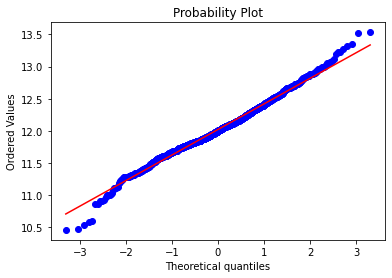

In [26]:
#transformed histogram and normal probability plot
sns.distplot(df_houseprices_3['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_houseprices_3['SalePrice'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_houseprices_3['SalePrice'].skew())
print("Kurtosis: %f" % df_houseprices_3['SalePrice'].kurt())

So, we fixed the target. Found a few more features that could use a bit of help. <br>

Problem is, some of them have values of zero. That will complicate the log transformation but it can still be done. First, we need to break out the groups of easy and not-so-easy variables to treat them differently.

In [27]:
# easy log list
log_list = ['LotFrontage', 'GrLivArea', 'LotArea']

In [28]:
#applying log transformation in a for loop
for col in log_list:
    df_houseprices_3[col] = np.log(df_houseprices_3[col])

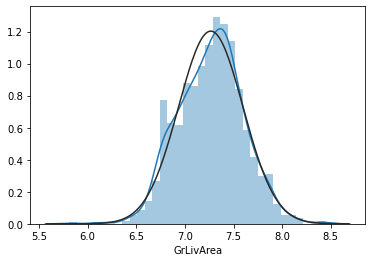

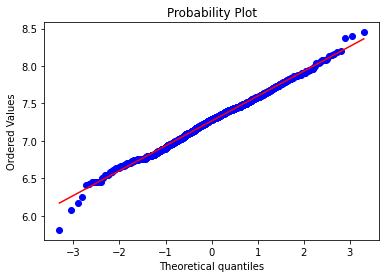

In [29]:
#transformed histogram and normal probability plot

#transformed histogram and normal probability plot
sns.distplot(df_houseprices_3['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_houseprices_3['GrLivArea'], plot=plt)

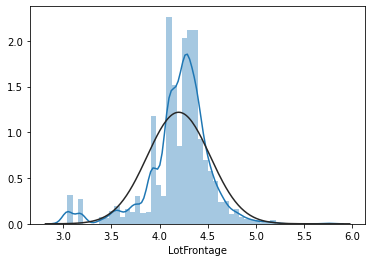

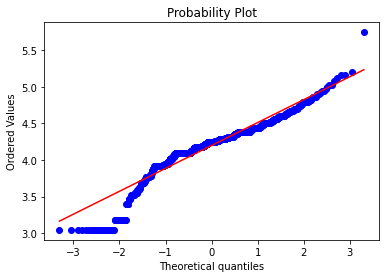

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df_houseprices_3['LotFrontage'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_houseprices_3['LotFrontage'], plot=plt)

Made some improvements. Let's move on to the harder variables now. The trick is how we treat the zeros. There are a couple additional steps to make. A new, indicator column is made. Then, we simply state that if the indicator is equal to 1, perform the log transformation. Else, leave it zero.

In [31]:
log_zero_list = ['TotalBsmtSF', 'GarageArea', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [32]:
for col in log_zero_list:
    df_houseprices_3['Has'+ col] = pd.Series(len(df_houseprices_3[col]), index=df_houseprices_3.index)
    df_houseprices_3['Has'+ col] = 0 
    df_houseprices_3.loc[df_houseprices_3[col]>0,'Has'+ col] = 1

In [33]:
#transform data
for col in log_zero_list:
    df_houseprices_3.loc[df_houseprices_3['Has'+ col]==1,col] = np.log(df_houseprices_3[col])

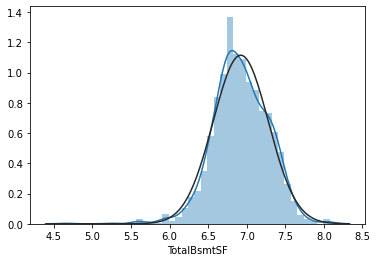

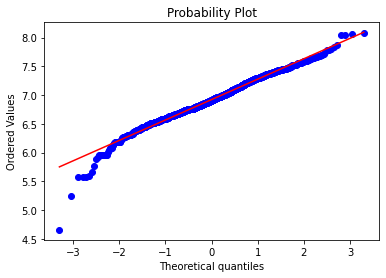

In [34]:
#histogram and normal probability plot
sns.distplot(df_houseprices_3[df_houseprices_3['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_houseprices_3[df_houseprices_3['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

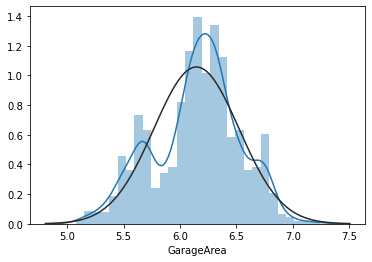

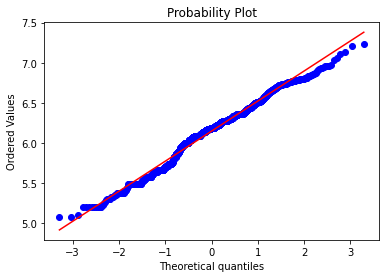

In [35]:
#histogram and normal probability plot
sns.distplot(df_houseprices_3[df_houseprices_3['GarageArea']>0]['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_houseprices_3[df_houseprices_3['GarageArea']>0]['GarageArea'], plot=plt)

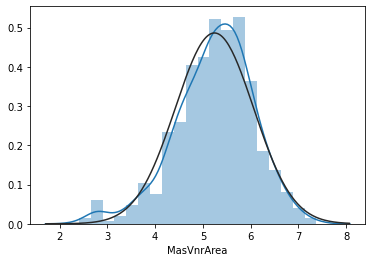

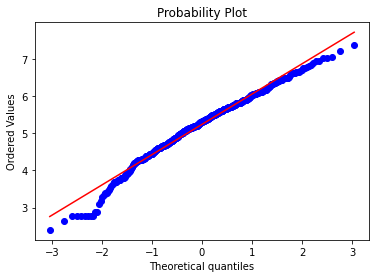

In [36]:
#histogram and normal probability plot
sns.distplot(df_houseprices_3[df_houseprices_3['MasVnrArea']>0]['MasVnrArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_houseprices_3[df_houseprices_3['MasVnrArea']>0]['MasVnrArea'], plot=plt)

- Notice, these variables now have a normal distribution.
- Keep in mind, the graphs display data greater than zero. They still exist in the data and will impact the models.

Next, let's jump into winsorizing a couple other features. <br>
Not every variable requires a log transformation.

Check out BsmtFullBath! <br>
Who has THAT many bathrooms in the basement? <br>
Is this a normal thing?

In [37]:
# only 1 entry with 3 full baths in the basement... might be worth fixing.
df_houseprices_3['BsmtFullBath'].value_counts()

0    855
1    587
2     12
3      1
Name: BsmtFullBath, dtype: int64

Only 1 home has 3 bathrooms in the basement. Is there something unique about this house that we should consider?

In [38]:
# nothing special about this entry that suggests it's a helpful value. 
df_houseprices_3.loc[df_houseprices_3['BsmtFullBath'] == 3]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL        4.094    9.287   Pave  NONE      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
738         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
738       Norm   Duplex     1Story            5            5       1987   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
738          1988     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
738       0.000        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
738          GLQ        1200          Unf           0          0        7.090   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
738    GasA        TA          Y      SBrkr      1200         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
738      7.090             3             0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
738             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
738        NONE       NONE        0.000         NONE           0       0.000   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
738       NONE       NONE          Y       4.787        0.000          0.000   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
738      0.000        0.000         0   NONE  NONE        NONE        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  HasTotalBsmtSF  \
738       3    2009       WD        Alloca     12.095               1   

     HasGarageArea  HasMasVnrArea  HasWoodDeckSF  HasOpenPorchSF  \
738              0              0              1               0   

     HasEnclosedPorch  Has3SsnPorch  HasScreenPorch  
738                 0             0               0

Nothing jumps out as significant and no other features appear to lay outside of normal values. Let's cap this down.

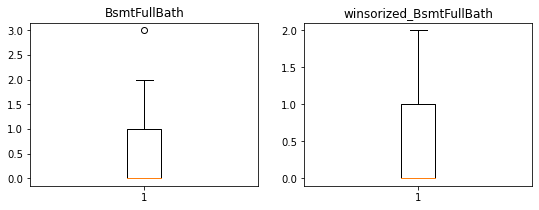

In [39]:
# Removing Outliers in the variables using Winsorization technique.
# 
#Winsorize BsmtFullBath
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
original_BsmtFullBath = df_houseprices_3['BsmtFullBath']
plt.boxplot(original_BsmtFullBath)
plt.title("BsmtFullBath")

plt.subplot(1,2,2)
df_houseprices_3['BsmtFullBath'] = winsorize(df_houseprices_3['BsmtFullBath'], (0.00, 0.001))
winsorized_df_houseprices_3 = df_houseprices_3['BsmtFullBath']
plt.boxplot(df_houseprices_3['BsmtFullBath'])
plt.title("winsorized_BsmtFullBath")

plt.show()

Some people must love fireplaces. However, 3 seems excessive. <br> The majority of homes have 0-2 fireplaces, with the exception of 4.

In [40]:
df_houseprices_3['Fireplaces'].value_counts()

0    690
1    650
2    111
3      4
Name: Fireplaces, dtype: int64

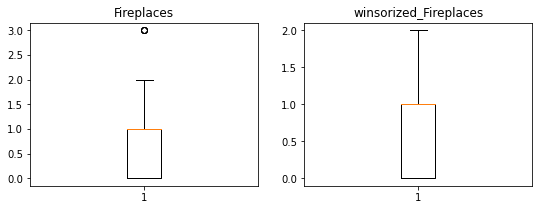

In [41]:
# Removing Outliers in the variables using Winsorization technique.
#Winsorize fireplaces
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
original_Fireplaces = df_houseprices_3['Fireplaces']
plt.boxplot(original_Fireplaces)
plt.title("Fireplaces")

plt.subplot(1,2,2)
df_houseprices_3['Fireplaces'] = winsorize(df_houseprices_3['Fireplaces'], (0.00, 0.004))
winsorized_df_houseprices_3 = df_houseprices_3['Fireplaces']
plt.boxplot(df_houseprices_3['Fireplaces'])
plt.title("winsorized_Fireplaces")

plt.show()

### Feature Engineering

One way we can get utility out of our data is by mapping numeric values to object columns with categorical ranking. This can be useful if we want to combine ranked information with other variables, which we'll see in just a bit.

In [42]:
df_houseprices_4 = df_houseprices_3.copy()

In [43]:
# new numeric column list
num_cols_2 = df_houseprices_4.select_dtypes(['int64', 'float64']).columns.copy()

In [44]:
# categorical data to numeric data
landslope_dict = {'Gtl' : 3, 'Mod' : 2, 'Sev' : 1}
exterqual_dict = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
extercond_dict = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
bsmtqual_dict = {'NONE' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
bsmtcond_dict = {'NONE' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
bsmtfintype1_dict = {'NONE' : 0, 'Unf' : 0, 'LwQ' : 1, 'Rec' : 2, 'BLQ' : 3, 'ALQ' : 4, 'GLQ' : 5}
bsmtfintype2_dict = {'NONE' : 0, 'Unf' : 0, 'LwQ' : 1, 'Rec' : 2, 'BLQ' : 3, 'ALQ' : 4, 'GLQ' : 5}
heatingqc_dict = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
kitchenqual_dict = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
functional_dict = {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}
fireplacequ_dict = {'NONE' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
garagequal_dict = {'NONE' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
garagecond_dict = {'NONE' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
poolqc_dict = {'NONE' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}

In [45]:
df_houseprices_4['LandSlope'] = df_houseprices_4['LandSlope'].map(landslope_dict).astype('int64')
df_houseprices_4['ExterQual'] = df_houseprices_4['ExterQual'].map(exterqual_dict).astype('int64')
df_houseprices_4['ExterCond'] = df_houseprices_4['ExterCond'].map(extercond_dict).astype('int64')

df_houseprices_4['BsmtQual'] = df_houseprices_4['BsmtQual'].map(bsmtqual_dict).astype('int64')
df_houseprices_4['BsmtCond'] = df_houseprices_4['BsmtCond'].map(bsmtcond_dict).astype('int64')
df_houseprices_4['BsmtFinType1'] = df_houseprices_4['BsmtFinType1'].map(bsmtfintype1_dict).astype('int64')
df_houseprices_4['BsmtFinType2'] = df_houseprices_4['BsmtFinType2'].map(bsmtfintype2_dict).astype('int64')

df_houseprices_4['HeatingQC'] = df_houseprices_4['HeatingQC'].map(heatingqc_dict).astype('int64')
df_houseprices_4['KitchenQual'] = df_houseprices_4['KitchenQual'].map(kitchenqual_dict).astype('int64')
df_houseprices_4['Functional'] = df_houseprices_4['Functional'].map(functional_dict).astype('int64')
df_houseprices_4['FireplaceQu'] = df_houseprices_4['FireplaceQu'].map(fireplacequ_dict).astype('int64')
df_houseprices_4['GarageQual'] = df_houseprices_4['GarageQual'].map(garagequal_dict).astype('int64')

df_houseprices_4['GarageCond'] = df_houseprices_4['GarageCond'].map(garagecond_dict).astype('int64')
df_houseprices_4['PoolQC'] = df_houseprices_4['PoolQC'].map(poolqc_dict).astype('int64')

- When we observe data, we should also think about what else we can learn. This sometimes means combining features to create a new variable. By doing this, we might be able to explain multiple variables in fewer columns. This has periphery benefits, like dimensionality reduction and/or decreasing risk of multicolinearity.
- Let's not forget about our ranked data. Nothing is a sure shot just yet but we can get creative when combining features like this.

In [46]:
# total square feet of the home: main house + basement
df_houseprices_4['TotalSF'] = df_houseprices_4['TotalBsmtSF'] + df_houseprices_4['1stFlrSF'] + df_houseprices_4['2ndFlrSF']

# combining quality and total square feet to give weight to nice, small homes vs poor, large homes
df_houseprices_4['TotalSF_Qual'] = df_houseprices_4['TotalSF'] * df_houseprices_4['OverallQual']

# determining IF a house was actually remodeled. Not the same as age of the home, so this can hopefully be another distinguising factor.
# changed the boolean to 1 and 0 to keep the dataframe homogenous with other boolean columns.
df_houseprices_4['Was_Remodeled'] = ((df_houseprices_4['YearRemodAdd'] - df_houseprices_4['YearBuilt']) > 0).astype('int64')

# years since last remodel
df_houseprices_4['yrs_since_remod'] = df_houseprices_4['YearRemodAdd'] - df_houseprices_4['YearBuilt']

# avoiding complexities with datetime, multiplying yrsold and mosold will combine both values into 1 column
df_houseprices_4['numeric_dates'] = df_houseprices_4['YrSold'] * df_houseprices_4['MoSold']

# Adding all the bathrooms up!!
df_houseprices_4['Total_Bathrooms'] = df_houseprices_4.FullBath + (df_houseprices_4.HalfBath * 0.5) + df_houseprices_4.BsmtFullBath + (df_houseprices_4.BsmtHalfBath * 0.5)

# outdoors lounging area
df_houseprices_4['Total_Porch_SF'] = df_houseprices_4.WoodDeckSF + df_houseprices_4.OpenPorchSF + df_houseprices_4.EnclosedPorch + df_houseprices_4['3SsnPorch'] + df_houseprices_4.ScreenPorch

# lot size vs slope
df_houseprices_4['Lot_Area_Slope'] = df_houseprices_4['LandSlope'] * df_houseprices_4['LotArea']

# quality of house vs lot size
df_houseprices_4['HouseQual_LotSize'] = df_houseprices_4['LotArea'] * df_houseprices_4['OverallCond']

### Get Dummies!

- There was some internal debate as to whether get_dummies or OneHotEncoding would be the way to go. Get_dummies won mainly because there is more flexbility in the data when selecting features. 
- Moreover, dropping out the first column was not coded in this process, which is against normal protocol. Reason being, not every variable has usable input for each home. Many homes do not have swimming pools or garages. So, deleting the first column for deductive purposes doesn't hold water in this case.
- We do, however, gain flexibility in removing the NONE entries through this process.

In [47]:
# Create number list, excluding Id and SalePrice. 
# we will then use this list to remove the numeric features from the dummies df.
# Retaining Id and SalePrice in the dummy df will allow us to merge dataframes later.
drop_num_list = [col_name for col_name in df_houseprices_4.select_dtypes(['int64', 'float64']).columns.copy()
              if col_name not in ["Id", "SalePrice"]]

# create object list
word_cols = df_houseprices_4.select_dtypes(include = object).columns.copy()

In [48]:
# new dummies df
df_dummies = df_houseprices_4.copy()

# drop columns from drop_num_list
df_dummies = df_dummies.drop(drop_num_list, axis = 1)

In [49]:
# running get dummies

# elected NOT to remove the first column because not every feature can be taken into account by deduction, especially where 
# multiple conditions are present. Also, not every dummy variable exists throughout the whole data set... like pools, alleys, 
# and fireplaces.

df_dummies= pd.get_dummies(data = df_dummies, columns = word_cols)

In [50]:
# removing dummies with NONE in the column name
# suggests the lack of data in the original variable
df_dummies_2 = df_dummies.loc[:, ~df_dummies.columns.str.endswith('NONE')]

df_dummies_2.head()

Id  SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0   1     12.248                 0            0            0            1   
1   2     12.109                 0            0            0            1   
2   3     12.317                 0            0            0            1   
3   4     11.849                 0            0            0            1   
4   5     12.429                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  \
0            0            0            1           0           0   
1            0            0            1           0           0   
2            0            0            1           0           0   
3            0            0            1           0           0   
4            0            0            1           0           0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             0             0             0             1                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_AllPub  \
0                0                0                1                 1   
1                0                0                1                 1   
2                0                0                1                 1   
3                0                0                1                 1   
4                0                0                1                 1   

   Utilities_NoSeWa  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                 0                 0                  0              0   
1                 0                 0                  0              1   
2                 0                 0                  0              0   
3                 0                 1                  0              0   
4                 0                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blmngtn  \
0              0                 1                     0   
1              0                 0                     0   
2              0                 1                     0   
3              0                 0                     0   
4              0                 0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0  

### Categorical PCA

Now that we have broken out the dummy columns, it's time for the first draft of selecting the categorical variables. Treating these separately from the continuous variables can save heart ache, so this is being done prior to merging the dataframes.

In [51]:
# model feature list
cat_list = df_dummies_2.select_dtypes(include = 'uint8').columns.copy()


x = df_dummies_2[cat_list]
y = df_dummies_2['SalePrice']


In [52]:
hp_pca = PCA(n_components=10)

# preprocessing data by fitting everything into the same range
x_scaled = StandardScaler().fit_transform(x)

xreg = hp_pca.fit_transform(x_scaled)

principalDataframe = pd.DataFrame(data = xreg, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

#principalDataframe = pd.concat([principalDataframe, merged_df_hp], axis=1)
pca_dummies = pd.concat([principalDataframe, df_dummies_2], axis=1)

In [53]:
# create linear regression object
regr = linear_model.LinearRegression()

# fit
regr.fit(xreg, y)

# calibrate
y_c = regr.predict(xreg)

# cross validation
y_cv = cross_val_predict(regr, xreg, y, cv=10)

# calc scores for calibrate and cv
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)

# # Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)

print(y_cv, score_c, score_cv, mse_c, mse_cv)

[12.21127178 11.97599002 12.32864633 ... 12.0921092  11.7667701
 11.93943638] 0.5480227600722742 0.540271183321591 0.07188990304411184 0.07312284145741495


Keep in mind the goal here and that is to communicate which features are important to the customer, not just to the model. The next few steps may look foreign but is simple enough to explain. <br>

Determining strength of correlation with the target and principal components can allow us to gain insight into the best features to keep around in the model. By eliminating the variables with little impact, we lose dimensionality and can also learn more about what features remain important at this point.

In [54]:
correlation_cat = abs(pca_dummies[pca_dummies.columns[0:]].corr()['SalePrice'][:]).sort_values()
print(correlation_cat)

LandContour_Lvl         0.001
MiscFeature_Gar2        0.002
SaleType_ConLI          0.003
Exterior2nd_BrkFace     0.004
LotConfig_Corner        0.005
RoofMatl_Metal          0.005
LotConfig_FR2           0.006
RoofStyle_Mansard       0.006
Exterior1st_Plywood     0.007
Condition2_RRAe         0.009
PC4                     0.009
Foundation_Wood         0.009
RoofMatl_Tar&Grv        0.010
PC2                     0.010
Alley_Pave              0.011
HouseStyle_SLvl         0.011
Utilities_NoSeWa        0.013
Utilities_AllPub        0.013
Condition1_RRNe         0.013
RoofMatl_Roll           0.013
Condition2_RRAn         0.013
PC10                    0.014
PC8                     0.014
Foundation_Stone        0.014
Id                      0.015
Condition1_RRAn         0.017
Fence_GdPrv             0.018
Neighborhood_Blueste    0.018
Exterior2nd_Stone       0.018
LandContour_Low         0.018
GarageType_2Types       0.020
LotConfig_FR3           0.023
Condition1_RRNn         0.023
SaleType_C

In [55]:
correlation_df_pc1 = abs(pca_dummies[pca_dummies.columns[0:]].corr()['PC1'][:]).sort_values()
print(correlation_df_pc1)

PC5                     0.000
PC3                     0.000
PC7                     0.000
PC10                    0.000
PC2                     0.000
PC4                     0.000
PC6                     0.000
PC9                     0.000
PC8                     0.000
Condition2_RRAn         0.000
Foundation_Wood         0.001
Exterior1st_WdShing     0.002
Id                      0.002
Neighborhood_NWAmes     0.003
Neighborhood_Veenker    0.003
Exterior2nd_Other       0.004
BldgType_Duplex         0.004
Neighborhood_Gilbert    0.004
RoofStyle_Gable         0.004
RoofStyle_Mansard       0.005
GarageType_Basment      0.005
Exterior2nd_Stone       0.005
Condition1_PosA         0.005
SaleType_CWD            0.005
PavedDrive_P            0.006
RoofStyle_Hip           0.006
SaleType_ConLD          0.006
MiscFeature_Gar2        0.007
GarageType_2Types       0.007
Exterior1st_ImStucc     0.007
Foundation_Slab         0.008
Neighborhood_Sawyer     0.008
RoofMatl_Metal          0.008
RoofStyle_

In [56]:
correlation_df_pc2 = abs(pca_dummies[pca_dummies.columns[0:]].corr()['PC2'][:]).sort_values()
print(correlation_df_pc2)

PC8                     0.000
PC10                    0.000
PC9                     0.000
PC6                     0.000
PC5                     0.000
PC1                     0.000
PC3                     0.000
PC4                     0.000
PC7                     0.000
Exterior1st_MetalSd     0.000
RoofMatl_Membran        0.001
Alley_Grvl              0.002
Neighborhood_Blmngtn    0.002
Heating_GasW            0.002
Exterior2nd_Stone       0.003
Exterior2nd_MetalSd     0.003
HouseStyle_2.5Fin       0.003
GarageType_CarPort      0.003
Neighborhood_NPkVill    0.004
Condition1_RRAn         0.004
GarageFinish_Unf        0.004
Foundation_Stone        0.004
HouseStyle_1.5Unf       0.004
Condition2_Artery       0.004
RoofStyle_Gable         0.004
Street_Grvl             0.004
Street_Pave             0.004
PavedDrive_P            0.004
Condition1_RRNn         0.005
Exterior2nd_Wd Sdng     0.005
Exterior2nd_Stucco      0.005
BldgType_Duplex         0.005
Electrical_FuseA        0.006
MiscFeatur

In [57]:
lower_corr_df = pd.DataFrame(correlation_cat)

lower_corr_df.columns = ['correlation_cat']

# correlation df
lower_corr_df = lower_corr_df.copy()

lower_corr_df = lower_corr_df.drop(['Id','SalePrice'])

In [58]:
to_drop_corr = lower_corr_df[lower_corr_df['correlation_cat'] < 0.10].index
print(to_drop_corr)

Index(['LandContour_Lvl', 'MiscFeature_Gar2', 'SaleType_ConLI',
       'Exterior2nd_BrkFace', 'LotConfig_Corner', 'RoofMatl_Metal',
       'LotConfig_FR2', 'RoofStyle_Mansard', 'Exterior1st_Plywood',
       'Condition2_RRAe',
       ...
       'MiscFeature_Shed', 'SaleType_COD', 'GarageType_CarPort',
       'LotConfig_Inside', 'Neighborhood_Crawfor', 'RoofMatl_CompShg',
       'Exterior2nd_CmentBd', 'PavedDrive_P', 'HouseStyle_SFoyer',
       'Exterior1st_CemntBd'],
      dtype='object', length=116)


In [59]:
# Drop features 
pca_dummies_2 = pca_dummies.drop(to_drop_corr, axis=1)

In [60]:
pca_dummies_2.head()

PC1    Id  SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RL  \
0 -2.514 1.000     12.248             0.000        0.000        1.000   
1 -0.071 2.000     12.109             0.000        0.000        1.000   
2 -3.159 3.000     12.317             0.000        0.000        1.000   
3  2.010 4.000     11.849             0.000        0.000        1.000   
4 -3.610 5.000     12.429             0.000        0.000        1.000   

   MSZoning_RM  Alley_Grvl  LotShape_IR1  LotShape_IR2  LotShape_Reg  \
0        0.000       0.000         0.000         0.000         1.000   
1        0.000       0.000         0.000         0.000         1.000   
2        0.000       0.000         1.000         0.000         0.000   
3        0.000       0.000         1.000         0.000         0.000   
4        0.000       0.000         1.000         0.000         0.000   

   LandContour_Bnk  LandContour_HLS  LotConfig_CulDSac  Neighborhood_BrDale  \
0            0.000            0.000              0.000                0.000   
1            0.000            0.000              0.000                0.000   
2            0.000            0.000              0.000                0.000   
3            0.000            0.000              0.000                0.000   
4            0.000            0.000              0.000                0.000   

   Neighborhood_BrkSide  Neighborhood_CollgCr  Neighborhood_Edwards  \
0                 0.000                 1.000                 0.000   
1                 0.000                 0.000                 0.000   
2                 0.000                 1.000                 0.000   
3                 0.000                 0.000                 0.000   
4                 0.000                 0.000                 0.000   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NAmes  \
0                0.000                 0.000               0.000   
1                0.000                 0.000               0.000   
2                0.000                 0.000               0.000   
3                0.000                 0.000               0.000   
4                0.000                 0.000               0.000   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                 0.000                 0.000                 0.000   
1                 0.000                 0.000                 0.000   
2                 0.000                 0.000                 0.000   
3                 0.000                 0.000                 0.000   
4                 1.000                 0.000                 0.000   

   Neighborhood_Sawyer  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                0.000                 0.000                 0.000   
1                0.000                 0.000                 0.000   
2                0.000                 0.000                 0.000   
3                0.000                 0.000                 0.000   
4                0.000                 0.000                 0.000   

   Neighborhood_Timber  Condition1_Artery  Condition1_Feedr  Condition1_Norm  \
0                0.000              0.000             0.000            1.000   
1                0.000              0.000             1.000            0.000   
2                0.000              0.000             0.000            1.000   
3                0.000              0.000             0.000            1.000   
4                0.000              0.000             0.000            1.000   

   BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0          1.000            0.000            0.000           0.000   
1          1.000            0.000            0.000           0.000   
2          1.000            0.000            0.000           0.000   
3          1.000            0.000            0.000           0.000   
4          1.000            0.000            0.000           0.000   

   HouseStyle_1.5Fin  HouseStyle_1.5Unf  HouseStyle_2Story  RoofStyle_Ga

In [61]:
pca_dummies_2 = pca_dummies_2.drop('PC1', axis = 1)

### Numeric Variable Selection

Next up, numeric data! The first thing checked will be high collinearity between feature pairs. After that, we will repeat the process shown in the categorical feature removal process. 

In [62]:
# new numeric column list
num_cols_3 = [col_name for col_name in df_houseprices_4.select_dtypes(['int64', 'float64']).columns.copy()
              if col_name not in ["Id"]]
num_cols_3

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HasTotalBsmtSF',
 'HasGarageArea',
 'HasMasVnrArea',
 'HasWoodDeckSF',
 'HasOpenPorchSF',
 'HasEnclosedPorch',
 'Has3SsnPorch',
 'HasScreenPorch',
 'TotalSF',
 'TotalSF_Qual',
 'Was_Remodeled',
 'yrs_since_remod',
 'numeric_dates',
 'Total_Bath

In [63]:
df_hp = df_houseprices_4.copy()

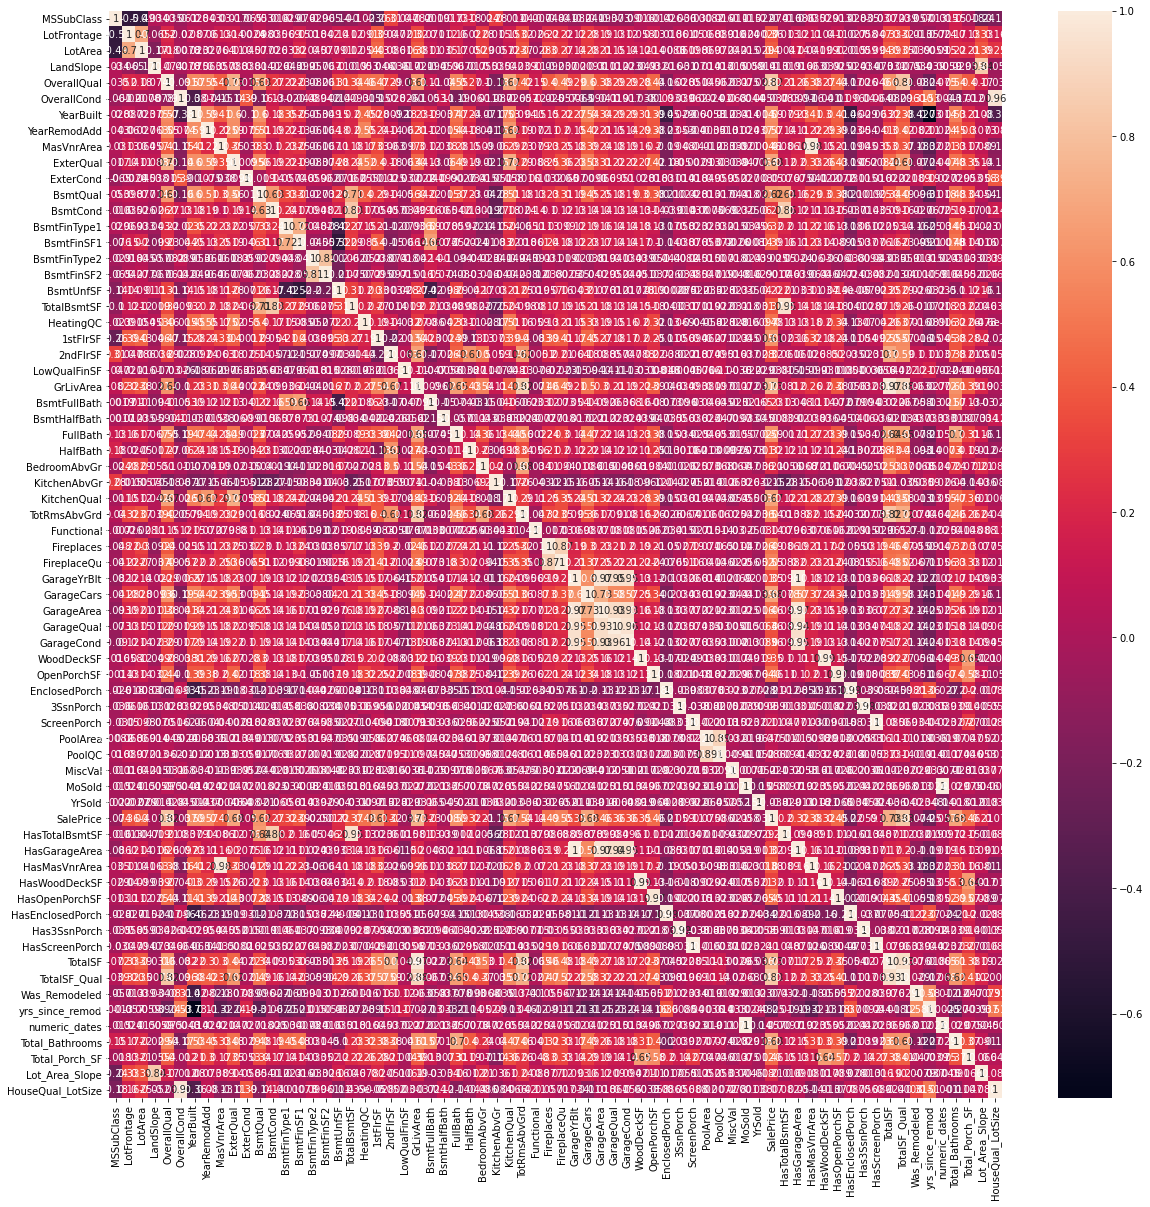

In [63]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(df_hp[num_cols_3].corr(),annot=True)

The correlation coef cut off of 0.87 was decided based on visual aid. 1 feature from any pairs of columns that have relationships greater than 0.87 will be removed.

In [64]:
# Create correlation matrix
corr_matrix = df_hp[num_cols_3].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.87
to_drop = [column for column in upper.columns if any(upper[column] > 0.87)]

# Drop features 
df_hp.drop(to_drop, axis=1, inplace=True)

In [65]:
# new numeric column list
num_cols_4 = df_hp.select_dtypes(['int64', 'float64']).columns.copy()

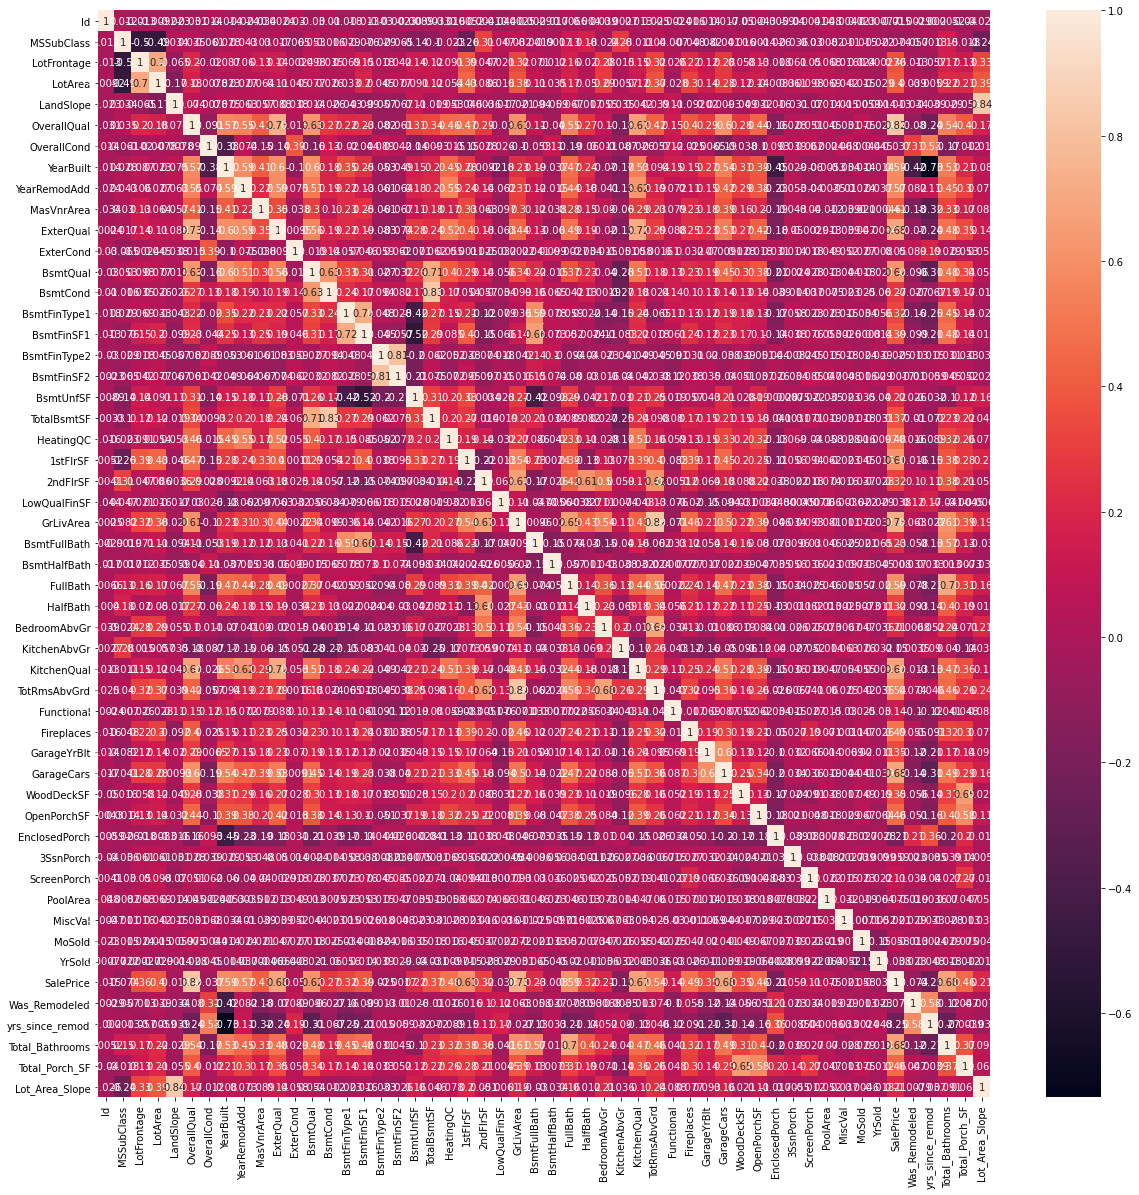

In [66]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(df_hp[num_cols_4].corr(),annot=True)

In [66]:
# Comparing correlation strength with "SalePrice", sorted on correlation value.
# NOTE: None of the variables have a strong negative relationship with "SalePrice"
num_corr = abs(df_hp[df_hp.columns[1:]].corr()['SalePrice'][:]).sort_values()
print(num_corr)

BsmtFinSF2        0.002
BsmtHalfBath      0.008
LandSlope         0.013
MiscVal           0.021
BsmtFinType2      0.025
OverallCond       0.037
YrSold            0.038
LowQualFinSF      0.038
ExterCond         0.050
MoSold            0.058
3SsnPorch         0.059
MSSubClass        0.074
Was_Remodeled     0.074
PoolArea          0.075
ScreenPorch       0.107
Functional        0.136
KitchenAbvGr      0.147
EnclosedPorch     0.206
Lot_Area_Slope    0.206
BedroomAbvGr      0.209
BsmtUnfSF         0.225
BsmtFullBath      0.234
yrs_since_remod   0.249
BsmtCond          0.275
HalfBath          0.318
2ndFlrSF          0.322
BsmtFinType1      0.325
WoodDeckSF        0.345
GarageYrBlt       0.349
LotFrontage       0.361
TotalBsmtSF       0.372
BsmtFinSF1        0.387
LotArea           0.399
MasVnrArea        0.415
Total_Porch_SF    0.457
OpenPorchSF       0.463
HeatingQC         0.478
Fireplaces        0.490
TotRmsAbvGrd      0.538
YearRemodAdd      0.568
YearBuilt         0.590
FullBath        

Now that collinear features were handled, those with very low correlation coef with SalePrice will be removed.

In [67]:
lower_corr_df = pd.DataFrame(num_corr)
lower_corr_df.columns = ['CorrelationSalePrice']

# make drop list
to_drop = lower_corr_df[lower_corr_df['CorrelationSalePrice'] < 0.2].index

# Drop features 
df_hp_2 = df_hp.drop(to_drop, axis=1)

In [68]:
df_hp_2.head()

Id MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0   1       RL        4.174    9.042   Pave  NONE      Reg         Lvl   
1   2       RL        4.382    9.170   Pave  NONE      Reg         Lvl   
2   3       RL        4.220    9.328   Pave  NONE      IR1         Lvl   
3   4       RL        4.094    9.164   Pave  NONE      IR1         Lvl   
4   5       RL        4.431    9.565   Pave  NONE      IR1         Lvl   

  Utilities LotConfig Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    AllPub    Inside      CollgCr       Norm       Norm     1Fam     2Story   
1    AllPub       FR2      Veenker      Feedr       Norm     1Fam     1Story   
2    AllPub    Inside      CollgCr       Norm       Norm     1Fam     2Story   
3    AllPub    Corner      Crawfor       Norm       Norm     1Fam     2Story   
4    AllPub       FR2      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            7       2003          2003     Gable  CompShg     VinylSd   
1            6       1976          1976     Gable  CompShg     MetalSd   
2            7       2001          2002     Gable  CompShg     VinylSd   
3            7       1915          1970     Gable  CompShg     Wd Sdng   
4            8       2000          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       5.278          4      PConc         4   
1     MetalSd       None       0.000          3     CBlock         4   
2     VinylSd    BrkFace       5.088          4      PConc         4   
3     Wd Shng       None       0.000          3     BrkTil         3   
4     VinylSd    BrkFace       5.858          4      PConc         4   

   BsmtCond BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         3           No             5         706        150        6.752   
1         3           Gd             4         978        284        7.140   
2         3           Mn             5         486        434        6.824   
3         4           No             4         216        540        6.628   
4         3           Av             5         655        490        7.043   

  Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA          5          Y      SBrkr       856       854      7.444   
1    GasA          5          Y      SBrkr      1262         0      7.140   
2    GasA          5          Y      SBrkr       920       866      7.488   
3    GasA          4          Y      SBrkr       961       756      7.448   
4    GasA          5          Y      SBrkr      1145      1053      7.695   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3            4             8   
1             0         2         0             3            3             6   
2             1         2         1             3            4             6   
3             1         1         0             3            4             7   
4             1         2         1             4            4             9   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars PavedDrive  \
0           0     Attchd     2003.000          RFn           2          Y   
1           1     Attchd     1976.000          RFn           2          Y   
2           1     Attchd     2001.000          RFn           2          Y   
3           1     Detchd     1998.000          Unf           3          Y   
4           1     Attchd     2000.000          RFn           3          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch Fence MiscFeature SaleType  \
0       0.000        4.111          0.000  NONE        NONE       WD   
1       5.697        0.000          0.000  NONE        NONE       WD   
2       0.000        3.738          0.000  NONE        NONE       WD   
3       0.000        3.555         

In [69]:
# new numeric column list
num_cols_5 = df_hp_2.select_dtypes(['int64', 'float64']).columns.copy()

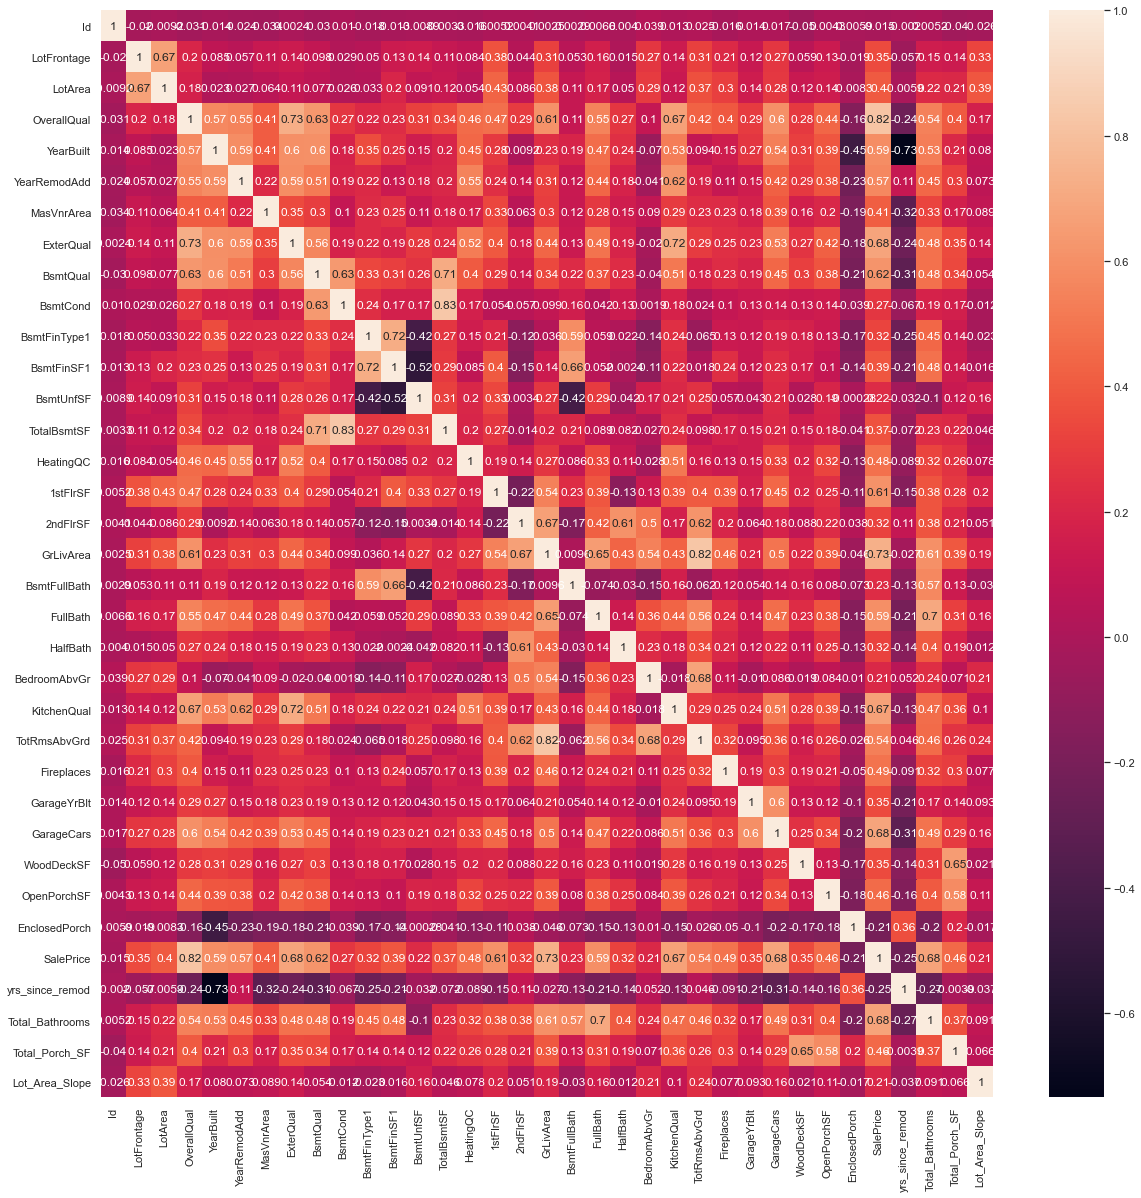

In [90]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(df_hp_2[num_cols_5].corr(),annot=True)

Ugh! Still not done! Some features like GarageYrBlt and GarageCars actually describe the same thing, but in a different way. We will remove the features with high collinearity but have the lesser of the correlation coef with SalePrice.

In [70]:
# Remove more colinear columns, but keep the variables with higher corr coef with saleprice
drop_list = ['GarageYrBlt','OverallQual', '1stFlrSF', 'TotRmsAbvGrd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']
df_hp_2 = df_hp_2.drop(drop_list, axis=1)

In [71]:
num_cols_6 = df_hp_2.select_dtypes(['int64', 'float64']).columns.copy()
word_cols = df_hp_2.select_dtypes(include = object).columns.copy()

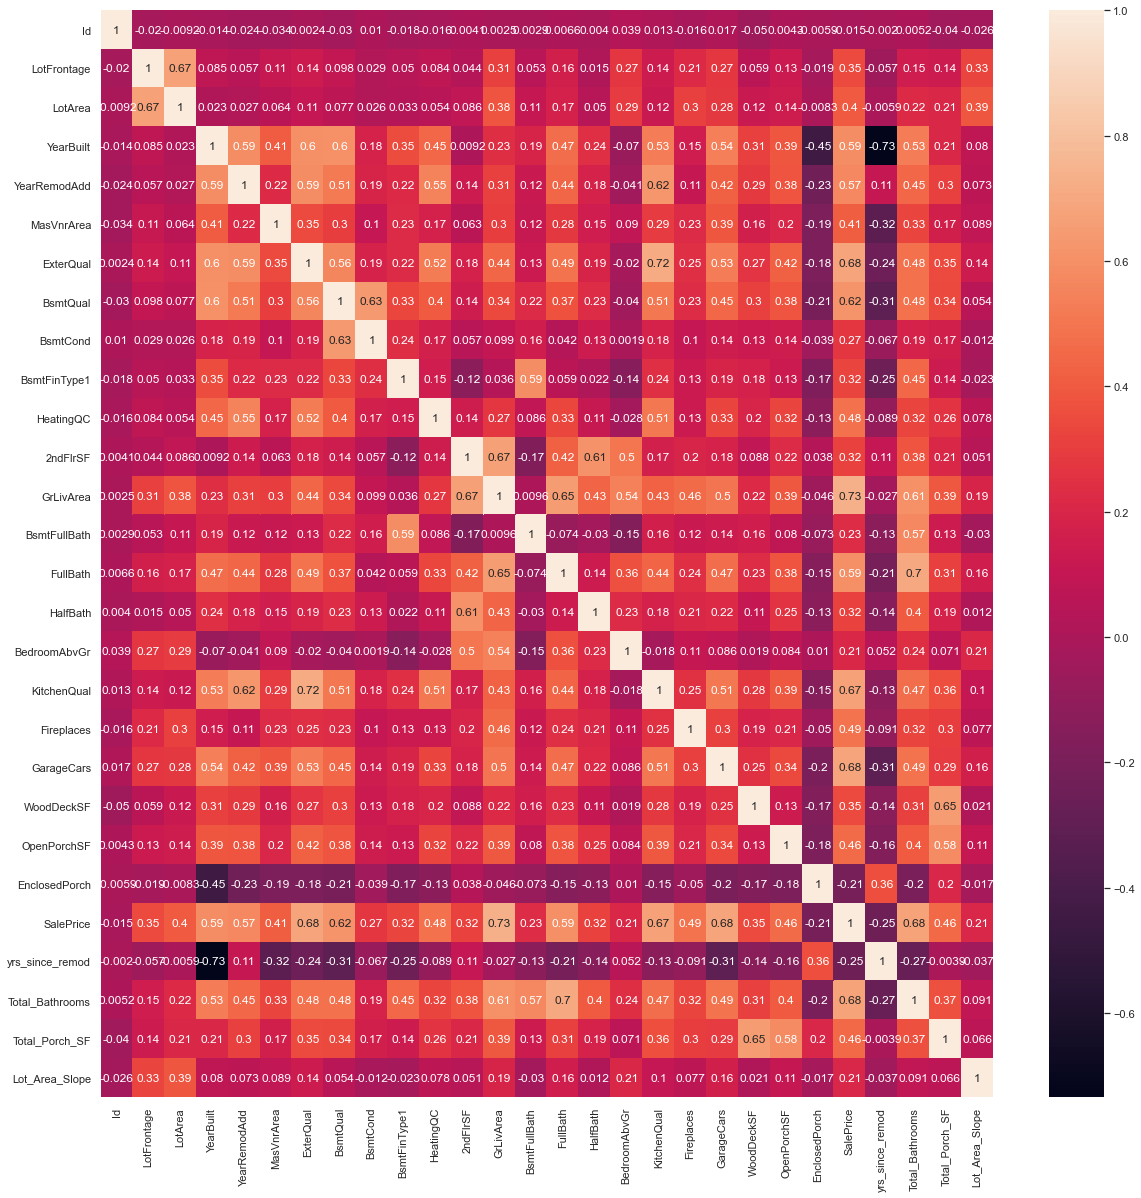

In [93]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(df_hp_2[num_cols_6].corr(),annot=True)

### Merging numerical and dummy dataframes

Now, it's that time you've all been waiting for! Merge the data frames!

In [72]:
# drop categorical variables from original data frame "df_hp_2"
df_hp_3 = df_hp_2.select_dtypes(exclude=['object'])

In [73]:
merged_df_hp = pd.merge(df_hp_3, pca_dummies_2, on= ['Id','SalePrice'])

In [74]:
merged_df_hp.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0   1        4.174    9.042       2003          2003       5.278          4   
1   2        4.382    9.170       1976          1976       0.000          3   
2   3        4.220    9.328       2001          2002       5.088          4   
3   4        4.094    9.164       1915          1970       0.000          3   
4   5        4.431    9.565       2000          2000       5.858          4   

   BsmtQual  BsmtCond  BsmtFinType1  HeatingQC  2ndFlrSF  GrLivArea  \
0         4         3             5          5       854      7.444   
1         4         3             4          5         0      7.140   
2         4         3             5          5       866      7.488   
3         3         4             4          4       756      7.448   
4         4         3             5          5      1053      7.695   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  \
0             1         2         1             3            4           0   
1             0         2         0             3            3           1   
2             1         2         1             3            4           1   
3             1         1         0             3            4           1   
4             1         2         1             4            4           1   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  \
0           2       0.000        4.111          0.000     12.248   
1           2       5.697        0.000          0.000     12.109   
2           2       0.000        3.738          0.000     12.317   
3           3       0.000        3.555          5.606     11.849   
4           3       5.257        4.431          0.000     12.429   

   yrs_since_remod  Total_Bathrooms  Total_Porch_SF  Lot_Area_Slope  \
0                0            3.500           4.111          27.126   
1                0            2.500           5.697          27.509   
2                1            3.500           3.738          27.984   
3               55            2.000           9.161          27.493   
4                0            3.500           9.688          28.696   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_Grvl  \
0             0.000        0.000        1.000        0.000       0.000   
1             0.000        0.000        1.000        0.000       0.000   
2             0.000        0.000        1.000        0.000       0.000   
3             0.000        0.000        1.000        0.000       0.000   
4             0.000        0.000        1.000        0.000       0.000   

   LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0         0.000         0.000         1.000            0.000            0.000   
1         0.000         0.000         1.000            0.000            0.000   
2         1.000         0.000         0.000            0.000            0.000   
3         1.000         0.000         0.000            0.000            0.000   
4         1.000         0.000         0.000            0.000            0.000   

   LotConfig_CulDSac  Neighborhood_BrDale  Neighborhood_BrkSide  \
0              0.000                0.000                 0.000   
1              0.000                0.000                 0.000   
2              0.000                0.000                 0.000   
3              0.000                0.000                 0.000   
4              0.000                0.000                 0.000   

   Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_IDOTRR  \
0                 1.000                 0.000                0.000   
1                 0.000                 0.000                0.000   
2                 1.000                 0.000                0.000   
3                 0.000                 0.000                0.000   
4                 0.000                 0.000                0.000   

   Neighborhood_MeadowV  Neighborhood_NA

In [75]:
merged_df_hp.shape

(1455, 106)

Cr@p, that's a lot columns.

### Addressing Multicollinearity... 
Because we must. <br>

Through trial and error, it became important to format column names to let the code work for some reason. 

In [76]:
spec_chars = ['.', ' ', '(', ')', '__', '&']

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    merged_df_hp.columns = merged_df_hp.columns.str.replace(char, '_')

In [77]:
correlation_df_pc2 = abs(merged_df_hp[merged_df_hp.columns[0:]].corr()['SalePrice'][:]).sort_values()
print(correlation_df_pc2)

Id                      0.015
SaleCondition_Normal    0.104
HouseStyle_1_5Unf       0.106
BldgType_Twnhs          0.109
LandContour_HLS         0.110
LandContour_Bnk         0.114
BldgType_2fmCon         0.116
BldgType_Duplex         0.117
Fence_GdWo              0.117
Condition1_Norm         0.118
LotShape_IR2            0.118
RoofMatl_WdShngl        0.120
Neighborhood_CollgCr    0.120
MSZoning_FV             0.121
Neighborhood_Sawyer     0.123
Condition1_Feedr        0.125
Neighborhood_BrDale     0.126
Condition1_Artery       0.130
Neighborhood_Timber     0.131
BldgType_1Fam           0.133
Exterior2nd_AsbShng     0.134
LotConfig_CulDSac       0.143
BsmtExposure_Av         0.144
Heating_GasA            0.146
Exterior1st_AsbShng     0.147
Heating_Grav            0.149
Neighborhood_MeadowV    0.149
Fence_MnPrv             0.150
Foundation_Slab         0.159
SaleCondition_Abnorml   0.160
Alley_Grvl              0.165
Neighborhood_NAmes      0.166
Electrical_FuseF        0.167
Exterior2n

In [78]:
# this was yet another dumb column format issue.
merged_df_hp.rename(columns={'2ndFlrSF':'SndFlrSF'}, inplace=True)
#merged_df_hp.rename(columns={'1stFlrSF':'FirstFlrSF '}, inplace=True)

After some research, it became obvious that addressing multicollinearity with VRF was a decent way to go. See if you can follow along!

In [79]:
merged_df_hp.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       ...
       'GarageFinish_Unf', 'PavedDrive_N', 'PavedDrive_Y', 'Fence_GdWo',
       'Fence_MnPrv', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=106)

In [80]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VRF(predict, data, y):
   
    scale = StandardScaler(with_std=False)
    df = pd.DataFrame(scale.fit_transform(data), columns= cols)
    features = "+".join(cols)
    df['SalePrice'] = y.values

    # get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df, return_type='dataframe')

   # Calculate VIF Factors
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    # Inspect VIF Factors
    display(vif.sort_values('VIF Factor'))
    return vif

# Remove the higest correlations and run a multiple regression
cols = merged_df_hp.columns
cols = cols.drop(['SalePrice'])
vif = VRF('SalePrice', merged_df_hp.loc[merged_df_hp.SalePrice>0, cols], merged_df_hp.SalePrice[merged_df_hp.SalePrice>0])

VIF Factor               features
0         1.000              Intercept
1         1.087                     Id
65        1.117       RoofMatl_WdShngl
99        1.126             Fence_GdWo
100       1.204            Fence_MnPrv
61        1.212      HouseStyle_1_5Unf
36        1.246        LandContour_Bnk
52        1.247    Neighborhood_Timber
37        1.252        LandContour_HLS
51        1.284   Neighborhood_StoneBr
38        1.320      LotConfig_CulDSac
49        1.406    Neighborhood_Sawyer
46        1.446   Neighborhood_NoRidge
32        1.451             Alley_Grvl
85        1.486           Heating_Grav
42        1.599   Neighborhood_Edwards
27        1.618         Lot_Area_Slope
44        1.638   Neighborhood_MeadowV
19        1.728             Fireplaces
84        1.765           Heating_GasA
41        1.824   Neighborhood_CollgCr
39        1.870    Neighborhood_BrDale
59        1.884         BldgType_Twnhs
53        2.024      Condition1_Artery
10        2.035           BsmtFinType1
11        2.049              HeatingQC
40        2.057   Neighborhood_BrkSide
47        2.082   Neighborhood_NridgHt
57        2.132        BldgType_2fmCon
45        2.193     Neighborhood_NAmes
60        2.300      HouseStyle_1_5Fin
82        2.302        BsmtExposure_Gd
28        2.317        MSZoning_C_all_
54        2.329       Condition1_Feedr
17        2.403           BedroomAbvGr
23        2.567          EnclosedPorch
43        2.623    Neighborhood_IDOTRR
81        2.715        BsmtExposure_Av
58        2.819        BldgType_Duplex
18        2.829            KitchenQual
55        2.963        Condition1_Norm
9         3.017               BsmtCond
102       3.028            SaleType_WD
2         3.105            LotFrontage
7         3.273              ExterQual
83        3.370        BsmtExposure_No
20        3.422             GarageCars
22        3.836            OpenPorchSF
70        4.034    Exterior2nd_AsbShng
21        4.073             WoodDeckSF
3         4.142                LotArea
103       4.196  SaleCondition_Abnorml
66        4.261    Exterior1st_AsbShng
97        4.332           PavedDrive_N
48        4.335   Neighborhood_OldTown
98        4.366           PavedDrive_Y
92        4.523     GarageType_BuiltIn
73        4.575    Exterior2nd_Wd_Sdng
69        4.731    Exterior1st_Wd_Sdng
56        4.783          BldgType_1Fam
8         4.947               BsmtQual
50        5.355   Neighborhood_Somerst
80        5.429        Foundation_Slab
13        6.189              GrLivArea
34        6.207           LotShape_IR2
62        6.307      HouseStyle_2Story
26        7.093         Total_Porch_SF
104       7.108   SaleCondition_Normal
89        7.560       Electrical_FuseF
76        7.621       MasVnrType_Stone
16        7.888               HalfBath
12        9.224               SndFlrSF
29        9.305            MSZoning_FV
63        9.415        RoofStyle_Gable
64        9.438          RoofStyle_Hip
93       10.707      GarageType_Detchd
91       12.683      GarageType_Attchd
77       17.374      Foundation_BrkTil
31       17.378            MSZoning_RM
94       17.589       GarageFinish_Fin
6        17.628             MasVnrArea
74       17.703     MasVnrType_BrkFace
30       18.314            MSZoning_RL
95       18.902       GarageFinish_RFn
14       20.610           BsmtFullBath
96       20.738       GarageFinish_Unf
67       21.101    Exterior1st_MetalSd
71       21.250    Exterior2nd_MetalSd
88       22.526       Electrical_FuseA
75       23.904        MasVnrType_None
72       25.775    Exterior2nd_VinylSd
68       26.491    Exterior1st_VinylSd
15       27.893               FullBath
90       28.659       Electrical_SBrkr
101      41.585           SaleType_New
105      44.522  SaleCondition_Partial
33       45.992           LotShape_IR1
78       46.162      Foundation_CBlock
79       46.884       Foundation_PConc
35       48.454           LotShape_Reg
25       51.663        Total_Bathrooms
87          inf           C

Okay. We are basically looking at the severity of multicollinearity in each column. The values towards the bottom keep increasing until you hit infinity. We need WAY lower values than that.

Now, I know what you're thinking "DELETE ALL THE HIGH VALUES!" You'd be wrong. This is a measure of MULTIcollinearity. Which means that by removing even 1 variable, we change a lot more values by extension. <br>

Also, there is a known tendancy to delete groups of data without thinking about what group they belong to. Keep in mind, we perfomed a dummy transformation to the columns, so there could be an accident where too many or all of the dummy features that made up the variable could be deleted. Best practice is to delete 1 or 2 per group at a time in an iterative process.

In [81]:
# Remove one feature with VIF on Inf from the same category and run a multiple regression
cols = cols.drop(['Condition1_Norm', 'FullBath', 'SaleCondition_Partial', 'GarageFinish_Unf', 'Neighborhood_Somerst', 'PavedDrive_N', 'Exterior1st_MetalSd', 'BldgType_1Fam', 'RoofStyle_Hip', 'MSZoning_RL', 'LandContour_HLS', 'GarageType_Attchd', 'MasVnrType_None', 'Foundation_PConc', 'SaleType_WD', 'Exterior2nd_VinylSd', 'HouseStyle_1_5Fin', 'LotShape_IR1'])
cols_drop = ['Condition1_Norm', 'FullBath', 'SaleCondition_Partial', 'GarageFinish_Unf', 'Neighborhood_Somerst', 'PavedDrive_N', 'Exterior1st_MetalSd', 'BldgType_1Fam', 'RoofStyle_Hip', 'MSZoning_RL', 'LandContour_HLS', 'GarageType_Attchd', 'MasVnrType_None', 'Foundation_PConc', 'SaleType_WD', 'Exterior2nd_VinylSd', 'HouseStyle_1_5Fin', 'LotShape_IR1']
vif = VRF('SalePrice', merged_df_hp.loc[merged_df_hp.SalePrice>0, cols], merged_df_hp.SalePrice[merged_df_hp.SalePrice>0])

VIF Factor               features
0        1.000              Intercept
1        1.070                     Id
56       1.097       RoofMatl_WdShngl
83       1.112             Fence_GdWo
49       1.145       Condition1_Feedr
31       1.158           LotShape_IR2
53       1.173      HouseStyle_1_5Unf
47       1.178    Neighborhood_Timber
84       1.196            Fence_MnPrv
33       1.202        LandContour_Bnk
46       1.204   Neighborhood_StoneBr
48       1.210      Condition1_Artery
50       1.255        BldgType_2fmCon
55       1.272        RoofStyle_Gable
34       1.301      LotConfig_CulDSac
45       1.364    Neighborhood_Sawyer
42       1.375   Neighborhood_NoRidge
30       1.414             Alley_Grvl
32       1.420           LotShape_Reg
78       1.440     GarageType_BuiltIn
72       1.465           Heating_Grav
26       1.466         Lot_Area_Slope
38       1.520   Neighborhood_Edwards
82       1.528           PavedDrive_Y
51       1.533        BldgType_Duplex
28       1.572            MSZoning_FV
27       1.572        MSZoning_C_all_
61       1.584    Exterior2nd_MetalSd
40       1.618   Neighborhood_MeadowV
37       1.662   Neighborhood_CollgCr
18       1.690             Fireplaces
71       1.750           Heating_GasA
43       1.783   Neighborhood_NridgHt
52       1.831         BldgType_Twnhs
35       1.842    Neighborhood_BrDale
36       1.867   Neighborhood_BrkSide
10       1.958           BsmtFinType1
11       2.008              HeatingQC
79       2.112      GarageType_Detchd
41       2.122     Neighborhood_NAmes
15       2.168               HalfBath
81       2.212       GarageFinish_RFn
69       2.251        BsmtExposure_Gd
16       2.259           BedroomAbvGr
58       2.334    Exterior1st_VinylSd
39       2.446    Neighborhood_IDOTRR
80       2.491       GarageFinish_Fin
67       2.510        Foundation_Slab
65       2.512      Foundation_BrkTil
22       2.541          EnclosedPorch
19       2.551             GarageCars
68       2.680        BsmtExposure_Av
17       2.766            KitchenQual
2        2.778            LotFrontage
9        2.943               BsmtCond
66       3.001      Foundation_CBlock
7        3.206              ExterQual
70       3.344        BsmtExposure_No
14       3.458           BsmtFullBath
3        3.519                LotArea
86       3.718  SaleCondition_Abnorml
29       3.746            MSZoning_RM
21       3.767            OpenPorchSF
60       3.911    Exterior2nd_AsbShng
44       3.956   Neighborhood_OldTown
20       4.030             WoodDeckSF
57       4.135    Exterior1st_AsbShng
54       4.274      HouseStyle_2Story
62       4.406    Exterior2nd_Wd_Sdng
59       4.503    Exterior1st_Wd_Sdng
85       4.622           SaleType_New
8        4.825               BsmtQual
64       5.144       MasVnrType_Stone
13       5.837              GrLivArea
24       6.150        Total_Bathrooms
87       6.424   SaleCondition_Normal
25       6.999         Total_Porch_SF
76       7.130       Electrical_FuseF
12       7.505               SndFlrSF
63      11.151     MasVnrType_BrkFace
6       12.860             MasVnrArea
75      21.120       Electrical_FuseA
77      26.819       Electrical_SBrkr
5          inf           YearRemodAdd
74         inf           CentralAir_Y
73         inf           CentralAir_N
4          inf              YearBuilt
23         inf        yrs_since_remod

In [82]:
# Remove one feature with highest VIF from the same category and run a multiple regression
cols = cols.drop(['BldgType_Twnhs', 'BsmtExposure_No', 'HalfBath', 'Exterior1st_Wd_Sdng', 'Electrical_SBrkr', 'SaleCondition_Normal', 'YearRemodAdd', 'Exterior1st_AsbShng', 'CentralAir_N', 'Exterior2nd_AsbShng', 'GarageType_Detchd', 'HouseStyle_2Story', 'MasVnrType_BrkFace', 'MSZoning_RM', 'SaleType_New', 'SndFlrSF', 'WoodDeckSF', 'BldgType_Twnhs'])
cols_drop_2 = ['BldgType_Twnhs', 'BsmtExposure_No', 'HalfBath', 'Exterior1st_Wd_Sdng', 'Electrical_SBrkr', 'SaleCondition_Normal', 'YearRemodAdd', 'Exterior1st_AsbShng', 'CentralAir_N', 'Exterior2nd_AsbShng', 'GarageType_Detchd', 'HouseStyle_2Story', 'MasVnrType_BrkFace', 'MSZoning_RM', 'SaleType_New', 'SndFlrSF', 'WoodDeckSF', 'BldgType_Twnhs']           
vif = VRF('SalePrice', merged_df_hp.loc[merged_df_hp.SalePrice>0, cols], merged_df_hp.SalePrice[merged_df_hp.SalePrice>0])

VIF Factor               features
0        1.000              Intercept
1        1.062                     Id
49       1.083       RoofMatl_WdShngl
70       1.092  SaleCondition_Abnorml
68       1.099             Fence_GdWo
44       1.127       Condition1_Feedr
26       1.150           LotShape_IR2
42       1.159    Neighborhood_Timber
47       1.163      HouseStyle_1_5Unf
69       1.167            Fence_MnPrv
28       1.175        LandContour_Bnk
43       1.181      Condition1_Artery
41       1.183   Neighborhood_StoneBr
45       1.203        BldgType_2fmCon
48       1.223        RoofStyle_Gable
64       1.230     GarageType_BuiltIn
62       1.232       Electrical_FuseA
63       1.264       Electrical_FuseF
57       1.282        BsmtExposure_Av
29       1.289      LotConfig_CulDSac
37       1.309   Neighborhood_NoRidge
40       1.342    Neighborhood_Sawyer
35       1.348   Neighborhood_MeadowV
23       1.379        MSZoning_C_all_
25       1.385             Alley_Grvl
27       1.400           LotShape_Reg
58       1.411        BsmtExposure_Gd
46       1.429        BldgType_Duplex
53       1.430       MasVnrType_Stone
22       1.444         Lot_Area_Slope
60       1.451           Heating_Grav
30       1.460    Neighborhood_BrDale
24       1.474            MSZoning_FV
33       1.488   Neighborhood_Edwards
51       1.493    Exterior2nd_MetalSd
52       1.500    Exterior2nd_Wd_Sdng
67       1.500           PavedDrive_Y
31       1.572   Neighborhood_BrkSide
32       1.634   Neighborhood_CollgCr
15       1.662             Fireplaces
18       1.673          EnclosedPorch
38       1.702   Neighborhood_NridgHt
59       1.703           Heating_GasA
34       1.727    Neighborhood_IDOTRR
5        1.731             MasVnrArea
9        1.911           BsmtFinType1
61       1.924           CentralAir_Y
10       1.961              HeatingQC
66       2.006       GarageFinish_RFn
36       2.070     Neighborhood_NAmes
17       2.145            OpenPorchSF
13       2.158           BedroomAbvGr
50       2.215    Exterior1st_VinylSd
16       2.225             GarageCars
21       2.274         Total_Porch_SF
65       2.296       GarageFinish_Fin
56       2.399        Foundation_Slab
54       2.445      Foundation_BrkTil
39       2.465   Neighborhood_OldTown
2        2.605            LotFrontage
14       2.741            KitchenQual
8        2.838               BsmtCond
55       2.901      Foundation_CBlock
6        3.170              ExterQual
12       3.207           BsmtFullBath
3        3.279                LotArea
19       3.580        yrs_since_remod
7        4.667               BsmtQual
11       4.683              GrLivArea
20       5.504        Total_Bathrooms
4       12.189              YearBuilt

Great! We removed so much. VIF Factor is way lower than before. Now, we just need to delete the features from our dataframe.

In [83]:
cols_drop.extend(cols_drop_2)

In [84]:
merged_df_hp_2 = merged_df_hp.drop(cols_drop, axis = 1).copy()

In [85]:
merged_df_hp_2.shape

(1455, 71)

# PCA

Next up! PCA! Just like we handled the dummy and continuous variables separately earlier, the same will apply in this section. But first, we need to reassign dtypes to our dummy columns so we can distinguish them in this process.

In [86]:
cat_cols = merged_df_hp_2.nunique().sort_values()
print(cat_cols)

Neighborhood_MeadowV        2
Exterior1st_VinylSd         2
RoofMatl_WdShngl            2
RoofStyle_Gable             2
HouseStyle_1_5Unf           2
BldgType_Duplex             2
BldgType_2fmCon             2
Exterior2nd_MetalSd         2
Condition1_Feedr            2
Neighborhood_Timber         2
Neighborhood_StoneBr        2
Neighborhood_Sawyer         2
Neighborhood_OldTown        2
Neighborhood_NridgHt        2
Neighborhood_NoRidge        2
Condition1_Artery           2
Neighborhood_NAmes          2
Exterior2nd_Wd_Sdng         2
Foundation_BrkTil           2
Fence_GdWo                  2
PavedDrive_Y                2
GarageFinish_RFn            2
GarageFinish_Fin            2
GarageType_BuiltIn          2
Electrical_FuseF            2
MasVnrType_Stone            2
Electrical_FuseA            2
Heating_Grav                2
Heating_GasA                2
BsmtExposure_Gd             2
BsmtExposure_Av             2
Foundation_Slab             2
Foundation_CBlock           2
CentralAir

In [87]:
cat_cols_2 = pd.DataFrame(cat_cols)
cat_cols_2.columns = ['cat_cols']

In [88]:
bool_list = cat_cols_2[cat_cols_2['cat_cols'] == 2].index

In [89]:
for col in bool_list:
    merged_df_hp_2[col]=merged_df_hp_2[col].astype('uint8')

In [90]:
# model feature list
feature_list = [col_name for col_name in merged_df_hp_2.select_dtypes(exclude = 'uint8').columns.copy()
              if col_name not in ["Id", "SalePrice"]]

In [91]:
x = merged_df_hp_2[feature_list]
y = merged_df_hp_2['SalePrice']

#scaler = MinMaxScaler()
#scaler.fit(x)                
#x_train = scaler.transform(x)
#x = MinMaxScaler().fit_transform(x)

In [92]:
hp_pca = PCA(n_components=10)

# preprocessing data by fitting everything into the same range
x_scaled = MinMaxScaler().fit_transform(x)

xreg = hp_pca.fit_transform(x_scaled)

principalDataframe = pd.DataFrame(data = xreg, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

#principalDataframe = pd.concat([principalDataframe, merged_df_hp], axis=1)
hp_pca_df = pd.concat([principalDataframe, merged_df_hp_2], axis=1)

In [93]:
# create linear regression object
regr = linear_model.LinearRegression()

# fit
regr.fit(xreg, y)

# calibrate
y_c = regr.predict(xreg)

# cross validation
y_cv = cross_val_predict(regr, xreg, y, cv=10)

# calc scores for calibrate and cv
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)

# # Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)

print(y_cv, score_c, score_cv, mse_c, mse_cv)

[12.29140231 12.04416322 12.41807173 ... 12.39050351 11.86446017
 11.89796784] 0.8269130708961361 0.823529504530418 0.027530595464208746 0.028068773576924534


In [94]:
hp_pca_df.head()

PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  Id  \
0  0.779 -0.270 -0.206 -0.287  0.312 -0.025  0.156  0.144 -0.005  0.072   1   
1 -0.028 -0.283  0.035  0.052 -0.382 -0.210 -0.255 -0.122 -0.040  0.176   2   
2  0.862 -0.198 -0.119  0.069 -0.004 -0.027  0.076  0.140  0.053  0.093   3   
3  0.014 -0.125  0.912  0.419  0.361 -0.130  0.004  0.019 -0.123 -0.097   4   
4  1.068 -0.010 -0.030  0.128  0.129  0.050  0.137  0.082 -0.106  0.138   5   

   LotFrontage  LotArea  YearBuilt  MasVnrArea  ExterQual  BsmtQual  BsmtCond  \
0        4.174    9.042       2003       5.278          4         4         3   
1        4.382    9.170       1976       0.000          3         4         3   
2        4.220    9.328       2001       5.088          4         4         3   
3        4.094    9.164       1915       0.000          3         3         4   
4        4.431    9.565       2000       5.858          4         4         3   

   BsmtFinType1  HeatingQC  GrLivArea  BsmtFullBath  BedroomAbvGr  \
0             5          5      7.444             1             3   
1             4          5      7.140             0             3   
2             5          5      7.488             1             3   
3             4          4      7.448             1             3   
4             5          5      7.695             1             4   

   KitchenQual  Fireplaces  GarageCars  OpenPorchSF  EnclosedPorch  SalePrice  \
0            4           0           2        4.111          0.000     12.248   
1            3           1           2        0.000          0.000     12.109   
2            4           1           2        3.738          0.000     12.317   
3            4           1           3        3.555          5.606     11.849   
4            4           1           3        4.431          0.000     12.429   

   yrs_since_remod  Total_Bathrooms  Total_Porch_SF  Lot_Area_Slope  \
0                0            3.500           4.111          27.126   
1                0            2.500           5.697          27.509   
2                1            3.500           3.738          27.984   
3               55            2.000           9.161          27.493   
4                0            3.500           9.688          28.696   

   MSZoning_C_all_  MSZoning_FV  Alley_Grvl  LotShape_IR2  LotShape_Reg  \
0                0            0           0             0             1   
1                0            0           0             0             1   
2                0            0           0             0             0   
3                0            0           0             0             0   
4                0            0           0             0             0   

   LandContour_Bnk  LotConfig_CulDSac  Neighborhood_BrDale  \
0                0                  0                    0   
1                0                  0                    0   
2                0                  0                    0   
3                0                  0                    0   
4                0                  0                    0   

   Neighborhood_BrkSide  Neighborhood_CollgCr  Neighborhood_Edwards  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_NAmes  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighbo

In [95]:
correlation_cat = abs(hp_pca_df.select_dtypes(exclude = 'uint8').corr()['SalePrice'][:]).sort_values()
print(correlation_cat)

PC8               0.008
Id                0.015
PC10              0.019
PC3               0.064
PC7               0.084
PC4               0.104
PC5               0.119
EnclosedPorch     0.206
Lot_Area_Slope    0.206
BedroomAbvGr      0.209
PC6               0.213
PC9               0.230
BsmtFullBath      0.234
yrs_since_remod   0.249
PC2               0.264
BsmtCond          0.275
BsmtFinType1      0.325
LotFrontage       0.361
LotArea           0.399
MasVnrArea        0.415
Total_Porch_SF    0.457
OpenPorchSF       0.463
HeatingQC         0.478
Fireplaces        0.490
YearBuilt         0.590
BsmtQual          0.617
KitchenQual       0.672
Total_Bathrooms   0.676
GarageCars        0.682
ExterQual         0.685
GrLivArea         0.734
PC1               0.789
SalePrice         1.000
Name: SalePrice, dtype: float64


In [96]:
correlation_df_pc1 = abs(hp_pca_df.select_dtypes(exclude = 'uint8').corr()['PC1'][:]).sort_values()
print(correlation_df_pc1)

PC7               0.000
PC9               0.000
PC3               0.000
PC10              0.000
PC2               0.000
PC5               0.000
PC6               0.000
PC4               0.000
PC8               0.000
Id                0.018
BedroomAbvGr      0.019
Lot_Area_Slope    0.115
LotArea           0.205
LotFrontage       0.222
BsmtCond          0.313
EnclosedPorch     0.342
Fireplaces        0.434
yrs_since_remod   0.448
BsmtFullBath      0.474
Total_Porch_SF    0.480
GrLivArea         0.487
HeatingQC         0.491
MasVnrArea        0.584
OpenPorchSF       0.595
GarageCars        0.618
BsmtFinType1      0.652
KitchenQual       0.652
BsmtQual          0.668
ExterQual         0.675
YearBuilt         0.739
Total_Bathrooms   0.747
SalePrice         0.789
PC1               1.000
Name: PC1, dtype: float64


In [97]:
correlation_df_pc2 = abs(hp_pca_df.select_dtypes(exclude = 'uint8').corr()['PC2'][:]).sort_values()
print(correlation_df_pc2)

PC8               0.000
PC7               0.000
PC9               0.000
PC1               0.000
PC10              0.000
PC3               0.000
PC4               0.000
PC6               0.000
PC5               0.000
Id                0.003
Total_Bathrooms   0.039
EnclosedPorch     0.051
BsmtCond          0.057
yrs_since_remod   0.064
YearBuilt         0.085
BsmtQual          0.103
LotFrontage       0.126
MasVnrArea        0.132
Lot_Area_Slope    0.154
LotArea           0.159
BedroomAbvGr      0.245
Fireplaces        0.247
HeatingQC         0.249
KitchenQual       0.253
GarageCars        0.256
SalePrice         0.264
ExterQual         0.292
Total_Porch_SF    0.371
GrLivArea         0.428
OpenPorchSF       0.471
BsmtFullBath      0.547
BsmtFinType1      0.706
PC2               1.000
Name: PC2, dtype: float64


- During this process, we've deduced that the only component that has a relatively high correlation coefficient with the target is PC1, R-squared of 0.789.
- The other 9 components trail far behind. 
- We can suggest that if a component lacks any meaningful relationship with the target, then the features with high correlation coefficient values with that component will not be much help predicting the target either. 
- Therefore, the next step will be to remove the features that have low correlation coefficient values with PC1.

In [98]:
lower_corr_df = pd.DataFrame(correlation_df_pc1)

lower_corr_df.columns = ['correlation_df_pc1']

# correlation df
lower_corr_df =lower_corr_df.select_dtypes(exclude = 'uint8').copy()

lower_corr_df = lower_corr_df.drop(['Id','SalePrice'])

In [99]:
to_drop_corr = lower_corr_df[lower_corr_df['correlation_df_pc1'] < 0.35].index
print(to_drop_corr)

Index(['PC7', 'PC9', 'PC3', 'PC10', 'PC2', 'PC5', 'PC6', 'PC4', 'PC8',
       'BedroomAbvGr', 'Lot_Area_Slope', 'LotArea', 'LotFrontage', 'BsmtCond',
       'EnclosedPorch'],
      dtype='object')


In [100]:
# Drop features 
hp_pca_df_2 = hp_pca_df.drop(to_drop_corr, axis=1)

In [101]:
# creating another dataframe for good measure
hp_pca_df_3 = hp_pca_df_2.drop('PC1', axis = 1)

In [102]:
hp_pca_df_3.shape

(1455, 65)

### Linear Regression Model
On to the fun stuff! Let's see how well this model holds up after we cleaned up, transformed, and removed so many variables.

In [103]:
# model feature list
feature_list_2 = [col_name for col_name in hp_pca_df_3.columns.copy()
              if col_name not in ["Id", "SalePrice"]]

In [104]:
X = hp_pca_df_3[feature_list_2]

Y = hp_pca_df_3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1164
The number of observations in test set is 291


In [105]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     138.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:18:26   Log-Likelihood:                 691.93
No. Observations:                1164   AIC:                            -1256.
Df Residuals:                    1100   BIC:                            -932.0
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.35

The OLS model results indicate the following:
- Adj. R-Squared of 0.882... not bad
- There are some P-values that are more than 0.05.
- A warning of multicolinearity is mentioned in the report... time to investigate!

In [106]:
# works off of linear reg model and normalizes features.
norm_x = hp_pca_df_3[feature_list_2].values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [107]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

229.7554431069784


The calculated condition number is over 200! Typical documentation suggests 20-50 is the upper end of tolerance.

In [108]:
# Remove the higest correlations and run a multiple regression
cols = feature_list_2

hp_pca_df_3[feature_list_2]

vif = VRF('SalePrice', hp_pca_df_3.loc[hp_pca_df_3.SalePrice>0, cols], hp_pca_df_3.SalePrice[hp_pca_df_3.SalePrice>0])

VIF Factor               features
0        1.000              Intercept
42       1.062       RoofMatl_WdShngl
63       1.090  SaleCondition_Abnorml
61       1.091             Fence_GdWo
19       1.114           LotShape_IR2
37       1.118       Condition1_Feedr
28       1.138   Neighborhood_MeadowV
35       1.145    Neighborhood_Timber
21       1.147        LandContour_Bnk
62       1.151            Fence_MnPrv
40       1.153      HouseStyle_1_5Unf
34       1.157   Neighborhood_StoneBr
36       1.179      Condition1_Artery
38       1.189        BldgType_2fmCon
41       1.203        RoofStyle_Gable
22       1.203      LotConfig_CulDSac
23       1.207    Neighborhood_BrDale
55       1.220       Electrical_FuseA
57       1.221     GarageType_BuiltIn
56       1.259       Electrical_FuseF
50       1.260        BsmtExposure_Av
51       1.277        BsmtExposure_Gd
30       1.288   Neighborhood_NoRidge
33       1.314    Neighborhood_Sawyer
20       1.351           LotShape_Reg
18       1.371             Alley_Grvl
16       1.372        MSZoning_C_all_
39       1.414        BldgType_Duplex
46       1.417       MasVnrType_Stone
53       1.434           Heating_Grav
17       1.435            MSZoning_FV
44       1.464    Exterior2nd_MetalSd
26       1.479   Neighborhood_Edwards
60       1.485           PavedDrive_Y
45       1.488    Exterior2nd_Wd_Sdng
24       1.528   Neighborhood_BrkSide
10       1.618             Fireplaces
25       1.622   Neighborhood_CollgCr
31       1.671   Neighborhood_NridgHt
52       1.695           Heating_GasA
27       1.702    Neighborhood_IDOTRR
2        1.708             MasVnrArea
15       1.875         Total_Porch_SF
54       1.879           CentralAir_Y
5        1.886           BsmtFinType1
12       1.952            OpenPorchSF
6        1.955              HeatingQC
59       1.959       GarageFinish_RFn
29       2.005     Neighborhood_NAmes
49       2.046        Foundation_Slab
11       2.143             GarageCars
43       2.206    Exterior1st_VinylSd
58       2.242       GarageFinish_Fin
32       2.338   Neighborhood_OldTown
47       2.428      Foundation_BrkTil
9        2.723            KitchenQual
48       2.838      Foundation_CBlock
8        3.069           BsmtFullBath
3        3.130              ExterQual
13       3.529        yrs_since_remod
4        3.545               BsmtQual
7        3.653              GrLivArea
14       5.296        Total_Bathrooms
1       11.473              YearBuilt

No denying we have some more work to do. Based on P-values and multicollinear concerns (again), there are several variables that need to be removed. Who knows? Maybe we can decrease the dimensionality and still retain accuracy.

In [109]:
# features to remove that influence multicollinearity and had high P-values
hp_pca_df_3= hp_pca_df_3.drop(['YearBuilt', 'yrs_since_remod', 'ExterQual', 'Fence_GdWo', 'PavedDrive_Y', 'Heating_GasA', 'LotShape_Reg', 'LotShape_IR2', 'Exterior2nd_MetalSd', 'LandContour_Bnk', 'Neighborhood_BrkSide', 'Neighborhood_Timber', 'Exterior2nd_Wd_Sdng', 'Electrical_FuseA', 'MasVnrArea', 'Neighborhood_CollgCr', 'Neighborhood_Sawyer', 'Electrical_FuseF', 'MSZoning_FV', 'Neighborhood_NAmes', 'HouseStyle_1_5Unf', 'GarageFinish_RFn', 'Heating_Grav', 'BldgType_2fmCon', 'Foundation_Slab', 'BsmtFullBath', 'Fence_MnPrv', 'Neighborhood_IDOTRR', 'GarageFinish_Fin', 'Exterior1st_VinylSd', 'OpenPorchSF','Foundation_CBlock'], axis = 1)

In [110]:
hp_pca_df_3.shape

(1455, 33)

Holy Dimensionality Reduction! We basically cut the data set in half. Let's try the OLS model again.

In [111]:
# model feature list
feature_list_2 = [col_name for col_name in hp_pca_df_3.columns.copy()
              if col_name not in ["Id", "SalePrice"]]

In [112]:
X = hp_pca_df_3[feature_list_2]

Y = hp_pca_df_3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1164
The number of observations in test set is 291


In [113]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     267.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:18:40   Log-Likelihood:                 651.78
No. Observations:                1164   AIC:                            -1240.
Df Residuals:                    1132   BIC:                            -1078.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.83

- That's looking better now. 
- Oh look! We deleted 32 variables and the model is hardly impacted.
- The last model's Adj R-squared was 0.882 and this one is 0.877.
- AIC and BIC are also very similar in both versions.

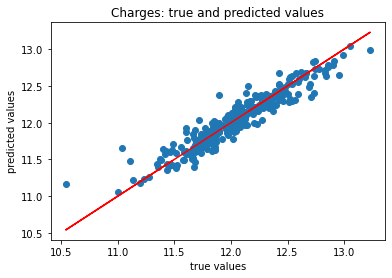

Mean absolute error of the prediction is: 0.09700591918040752
Mean squared error of the prediction is: 0.017346738639991297
Root mean squared error of the prediction is: 0.13170701818806504
Mean absolute percentage error of the prediction is: 0.8096580364083011


In [114]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

R-squared of the model in the training set is: 0.879921338897403
-----Test set statistics-----
R-squared of the model in the test set is: 0.8906409499445566
Mean absolute error of the prediction is: 0.09700591918040675
Mean squared error of the prediction is: 0.017346738639991307
Root mean squared error of the prediction is: 0.13170701818806507
Mean absolute percentage error of the prediction is: 0.8096580364082956


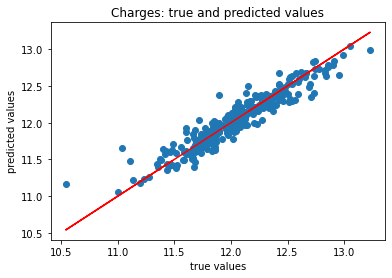

In [115]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

The model doesn't look half bad! Let's compare with a few other similar methods before moving on.

### Lasso Regression

Best alpha value is: 1e-06
R-squared of the model in training set is: 0.8799213328489247
-----Test set statistics-----
R-squared of the model in test set is: 0.8906424199979018
Mean absolute error of the prediction is: 0.09700536020329503
Mean squared error of the prediction is: 0.017346505457358927
Root mean squared error of the prediction is: 0.1317061329527176
Mean absolute percentage error of the prediction is: 0.8096534428375296


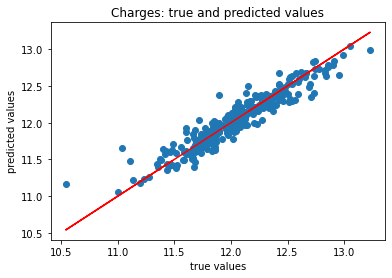

In [116]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

### Ridge Regression

Best alpha value is: 0.1
R-squared of the model on the training set is: 0.8799185044577646
-----Test set statistics-----
R-squared of the model on the test set is: 0.8906308062905361
Mean absolute error of the prediction is: 0.09703325996661907
Mean squared error of the prediction is: 0.017348347645510805
Root mean squared error of the prediction is: 0.1317131263219836
Mean absolute percentage error of the prediction is: 0.8098906896153439


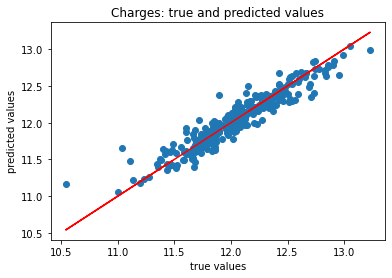

In [117]:
ridgeregr = RidgeCV(alphas=alphas, cv = 5) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("Best alpha value is: {}".format(ridgeregr.alpha_))
print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

### ElasticNet Regression

Best alpha value is: 1e-05
R-squared of the model on the training set is: 0.8799211135038798
-----Test set statistics-----
R-squared of the model on the test set is: 0.8906474895763626
Mean absolute error of the prediction is: 0.09700520055496831
Mean squared error of the prediction is: 0.01734570131126832
Root mean squared error of the prediction is: 0.13170308011306464
Mean absolute percentage error of the prediction is: 0.8096528600133706


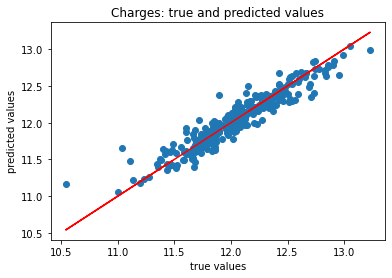

In [118]:
elasticregr = ElasticNetCV(alphas=alphas, cv=5)
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

There's almost no difference between these models.

The ElasticNet Regression model appears to have the best metrics though. R-sqaured is highest for the test set and the additional metrics are lower across the board compared to the other models. All models were very similar in terms of goodness of fit and metrics.
- R-squared for the training set is 0.879
- R-squared for the test set is 0.890
- MAE is 0.097
- MSE is 0.017
- RMSE is 0.131
- MAPE is 0.809

So, there was all this data from the same data set that was designed to tell a story. What happens to our model if external and independent data is applied?

### Adding in external data and applying to model. 
Let's quickly move through this and discuss the results.

In [119]:
external_data_df = pd.read_csv('ExternalData_Module17_Challenge.csv')
external_data_list = external_data_df.columns.copy()

In [120]:
external_data_df.describe()

numeric_dates  IntRate  MortgagePts  GDPBillions  PercChangeQtrly  \
count         54.000   54.000       54.000       54.000           54.000   
mean       12380.556    5.437        0.557    14408.913            0.767   
std         6961.861    0.722        0.113      374.802            3.297   
min         2006.000    4.180        0.400    13603.933           -8.400   
25%         6027.750    4.652        0.500    14208.569           -0.600   
50%        12045.000    5.770        0.600    14477.658            1.500   
75%        18069.750    6.007        0.700    14681.501            2.500   
max        24108.000    6.390        0.700    14926.098            5.400   

       UnempRate  StressIndex  
count     54.000       54.000  
mean       6.483        0.726  
std        2.214        1.922  
min        4.400       -1.122  
25%        4.700       -0.835  
50%        5.050        0.270  
75%        9.300        1.444  
max       10.000        7.768

In [121]:
# Count how many nulls there are per column
total_nulls = external_data_df.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)

total nulls per column
StressIndex        0
UnempRate          0
PercChangeQtrly    0
GDPBillions        0
MortgagePts        0
IntRate            0
numeric_dates      0
dtype: int64


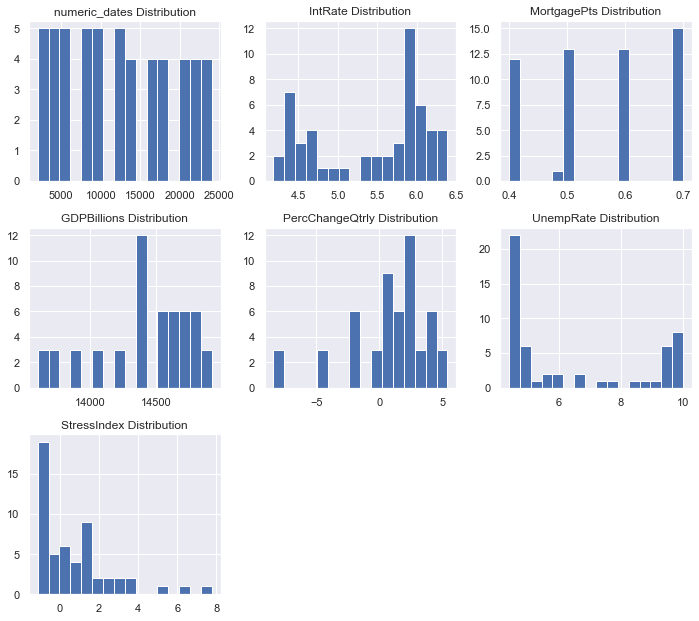

In [143]:
# Univariate visualization without having to manually plot each graph

def draw_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(10, 20))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=16,ax=ax)
        ax.set_title(var_name + " Distribution")
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(external_data_df, external_data_list, len(external_data_list), 3)

Merging dataframes

In [122]:
feature_list_3 = hp_pca_df_3.columns.copy()

In [123]:
num_dates = df_houseprices_4[['Id', 'numeric_dates']].copy()

In [124]:
merged_df_2 = pd.merge(num_dates, external_data_df, on = ['numeric_dates'])

In [125]:
merged_ext_df = pd.merge(hp_pca_df_3, merged_df_2, on = ['Id'])

In [126]:
merged_ext_df.head()

Id  BsmtQual  BsmtFinType1  HeatingQC  GrLivArea  KitchenQual  Fireplaces  \
0   1         4             5          5      7.444            4           0   
1   2         4             4          5      7.140            3           1   
2   3         4             5          5      7.488            4           1   
3   4         3             4          4      7.448            4           1   
4   5         4             5          5      7.695            4           1   

   GarageCars  SalePrice  Total_Bathrooms  Total_Porch_SF  MSZoning_C_all_  \
0           2     12.248            3.500           4.111                0   
1           2     12.109            2.500           5.697                0   
2           2     12.317            3.500           3.738                0   
3           3     11.849            2.000           9.161                0   
4           3     12.429            3.500           9.688                0   

   Alley_Grvl  LotConfig_CulDSac  Neighborhood_BrDale  Neighborhood_Edwards  \
0           0                  0                    0                     0   
1           0                  0                    0                     0   
2           0                  0                    0                     0   
3           0                  0                    0                     0   
4           0                  0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     1                     0   

   Neighborhood_OldTown  Neighborhood_StoneBr  Condition1_Artery  \
0                     0                     0                  0   
1                     0                     0                  0   
2                     0                     0                  0   
3                     0                     0                  0   
4                     0                     0                  0   

   Condition1_Feedr  BldgType_Duplex  RoofStyle_Gable  RoofMatl_WdShngl  \
0                 0                0                1                 0   
1                 1                0                1                 0   
2                 0                0                1                 0   
3                 0                0                1                 0   
4                 0                0                1                 0   

   MasVnrType_Stone  Foundation_BrkTil  BsmtExposure_Av  BsmtExposure_Gd  \
0                 0                  0                0                0   
1                 0                  0                0                1   
2                 0                  0                0                0   
3                 0                  1                0                0   
4                 0                  0                1                0   

   CentralAir_Y  GarageType_BuiltIn  SaleCondition_Abnorml  numeric_dates  \
0             1                   0                      0           4016   
1             1                   0                      0          10035   
2             1                   0                      0          18072   
3             1                   0                      1           4012   
4             1                   0                      0          24096   

   IntRate  MortgagePts  GDPBillions  PercChangeQtrly  UnempRate  StressIndex  
0    5.440        0.500    14651.039           -2.300      4.900        1.256  
1    5.970        0.400    14382.363            2.300      4.400       -0.845  
2    5.640        0.600    14835.187           -2.100      6.100        3.028  
3    5.860        0.600    13603.933            5.4

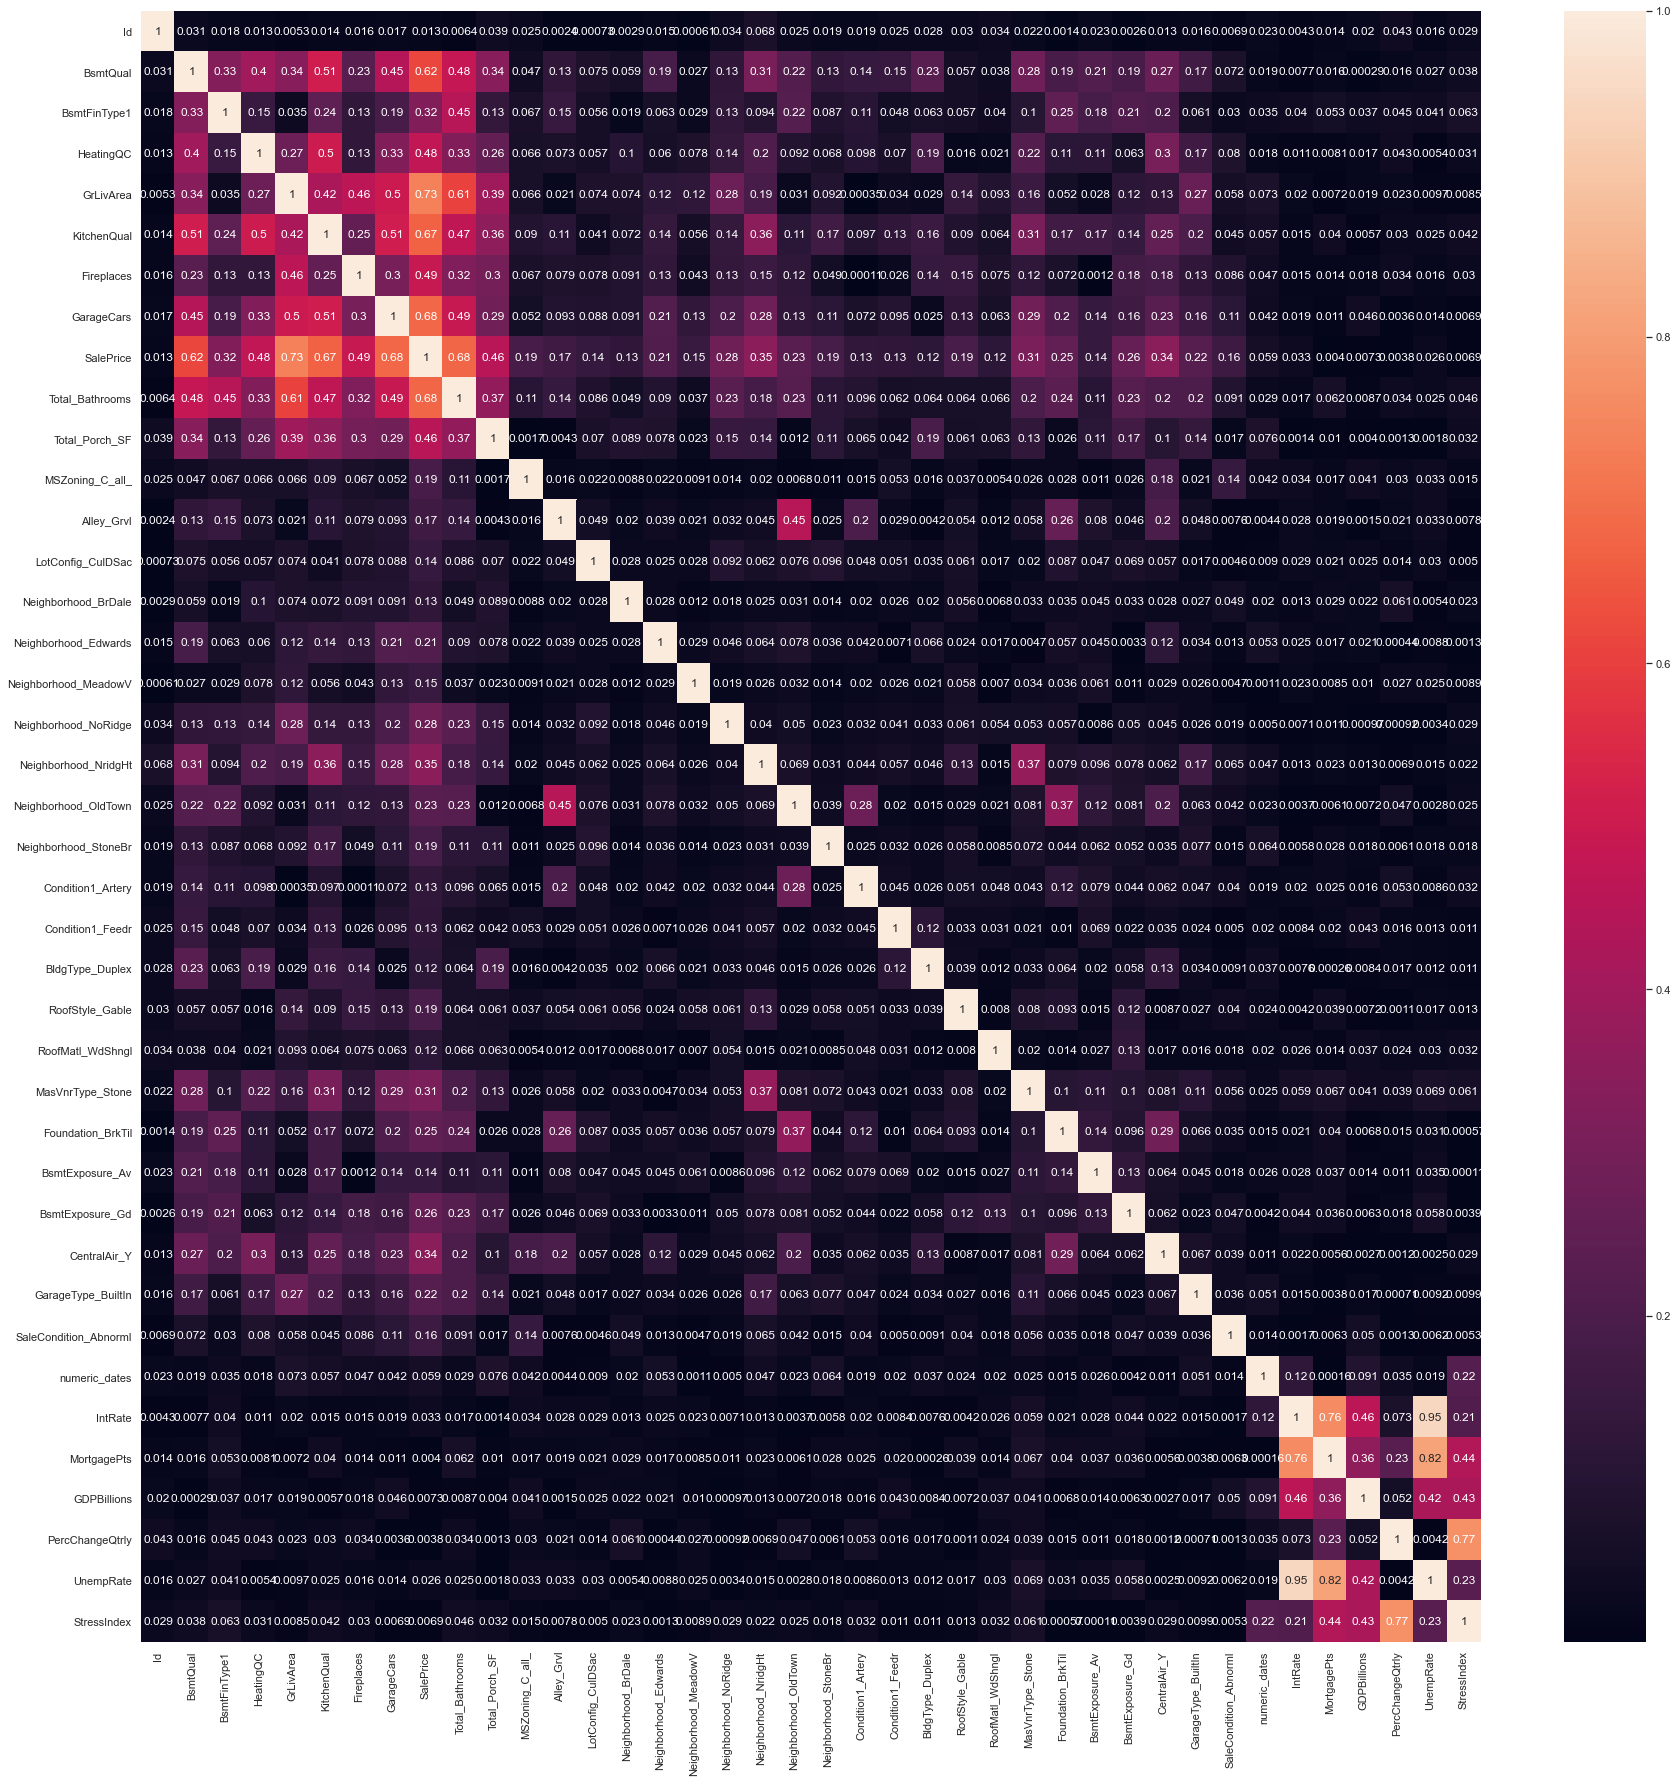

In [149]:
# See the correlation heatmap of the features
plt.figure(figsize=(30,30))
sns.heatmap(abs(merged_ext_df.corr()),annot=True)

Removing collinear features

In [127]:
merged_ext_df = merged_ext_df.drop(['UnempRate','StressIndex'], axis = 1)

In [128]:
# model feature list
feature_list_4 = [col_name for col_name in merged_ext_df.columns.copy()
              if col_name not in ['Id','SalePrice']]

In [129]:
# Remove the higest correlations and run a multiple regression
cols = feature_list_4

vif = VRF('SalePrice', merged_ext_df.loc[merged_ext_df.SalePrice>0, cols], merged_ext_df.SalePrice[merged_ext_df.SalePrice>0])

VIF Factor               features
0        1.000              Intercept
24       1.048       RoofMatl_WdShngl
13       1.051    Neighborhood_BrDale
31       1.056  SaleCondition_Abnorml
12       1.057      LotConfig_CulDSac
15       1.061   Neighborhood_MeadowV
21       1.064       Condition1_Feedr
19       1.078   Neighborhood_StoneBr
10       1.086        MSZoning_C_all_
23       1.096        RoofStyle_Gable
32       1.102          numeric_dates
20       1.134      Condition1_Artery
14       1.134   Neighborhood_Edwards
30       1.145     GarageType_BuiltIn
16       1.157   Neighborhood_NoRidge
27       1.184        BsmtExposure_Av
28       1.215        BsmtExposure_Gd
22       1.273        BldgType_Duplex
36       1.281        PercChangeQtrly
25       1.289       MasVnrType_Stone
11       1.318             Alley_Grvl
29       1.328           CentralAir_Y
26       1.332      Foundation_BrkTil
35       1.355            GDPBillions
17       1.363   Neighborhood_NridgHt
9        1.408         Total_Porch_SF
6        1.450             Fireplaces
3        1.540              HeatingQC
18       1.550   Neighborhood_OldTown
2        1.608           BsmtFinType1
7        1.844             GarageCars
1        1.916               BsmtQual
5        2.028            KitchenQual
4        2.547              GrLivArea
8        2.688        Total_Bathrooms
34       3.073            MortgagePts
33       3.358                IntRate

In [130]:
log_list_2 = ['numeric_dates', 'GDPBillions']

#applying log transformation in a for loop
for col in log_list_2:
    merged_ext_df[col] = np.log(merged_ext_df[col])

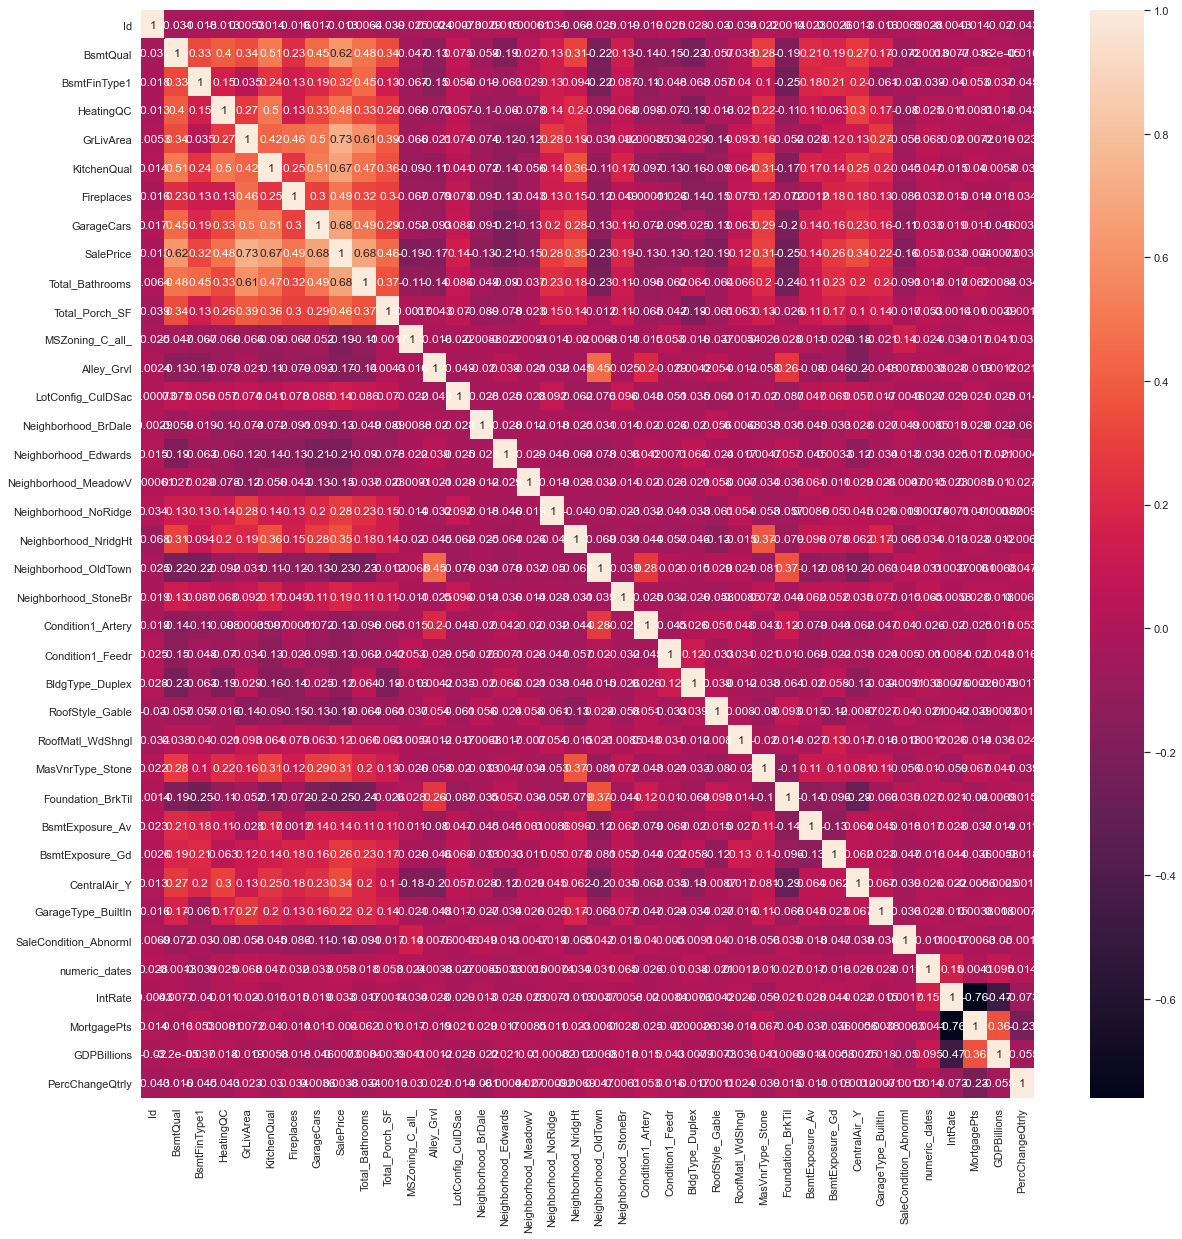

In [154]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(merged_ext_df.corr(),annot=True)

Running OLS

In [131]:
X = merged_ext_df[feature_list_4]
Y = merged_ext_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1159
The number of observations in test set is 290


In [132]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     238.9
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:19:32   Log-Likelihood:                 690.86
No. Observations:                1159   AIC:                            -1308.
Df Residuals:                    1122   BIC:                            -1121.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.71

Removing features with high multicollinearity and P-values

In [133]:
merged_ext_df = merged_ext_df.drop(['PercChangeQtrly', 'MortgagePts', 'RoofMatl_WdShngl', 'numeric_dates','GDPBillions'], axis = 1)

In [134]:
# model feature list
feature_list_4 = [col_name for col_name in merged_ext_df.columns.copy()
              if col_name not in ['Id','SalePrice']]

In [135]:
X = merged_ext_df[feature_list_4]
Y = merged_ext_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1159
The number of observations in test set is 290


In [136]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     276.5
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:19:41   Log-Likelihood:                 686.97
No. Observations:                1159   AIC:                            -1310.
Df Residuals:                    1127   BIC:                            -1148.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.76

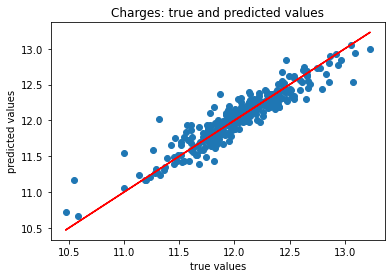

Mean absolute error of the prediction is: 0.11064769793345196
Mean squared error of the prediction is: 0.02302961792145274
Root mean squared error of the prediction is: 0.1517551248605883
Mean absolute percentage error of the prediction is: 0.9240796846613399


In [137]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Added the following external variables to the model: interest rate, mortgage points, GDP in billions($), percent change in GDP, unemployment rate, financial stress index. <br> 

- R-squared for the training set increased from 0.879 to 0.884
- R-squared for the test set decreased from 0.890 to 0.881
- MAE increased from 0.097 to 0.110
- MSE increased from 0.017 to 0.023
- RMSE increased from 0.131 to 0.151
- MAPE increased from 0.809 to 0.924

Looking at the P-values, all of the external features were significantly above 0.05. <br>

In summary, the new data seems to perform worse in the test set with the new data. Multicollinearity becomes an issue, R-squared decreases, and the performance metrics increase. Possible reasons for the degradation of the model could be explained the following:
 - Macro economic attributes of the USA is measured at a larger scale than house prices in one location
 - Some features aren't measured on the same timeline (quarterly vs monthly)
 - Factors not taken into consideration includes location features, personal finances, and market price vs negotiated contract price
 - It's likely that the housing market will follow macro economic trends on average but the specific features of each home will be responsible for the amount of variation of the value based on the local competition. 
 - Would recommend using multiple locations to compare a broader trend with the housing market if macro-economic features are introduced to the model. Moving forward, none of those features will be included.

### Regression Model Comparisons

Since the external data was not helpful, we will not include any of that data going forward.

In [253]:
# collect all R2 scores for comparison later

R2_Scores = []
MAE_Scores = []
MSE_Scores = []
RMSE_Scores = []

models = ['OLS Regression', 'ElasticNet Regression', 'GradientBoosting Regression', 'DecisionTree Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression'] 

In [254]:
# Set up the features
X = hp_pca_df_3[feature_list_2]

Y = hp_pca_df_3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1164
The number of observations in test set is 291


### OLS Regression

In [255]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()
print('')
print('####### OLS Regression #######')
# We print the summary results
print(results.summary())





####### OLS Regression #######
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     267.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:49:11   Log-Likelihood:                 651.78
No. Observations:                1164   AIC:                            -1240.
Df Residuals:                    1132   BIC:                            -1078.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

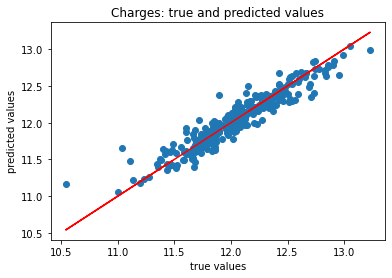

Mean absolute error of the prediction is: 0.09700591918040752
Mean squared error of the prediction is: 0.017346738639991297
Root mean squared error of the prediction is: 0.13170701818806504
Mean absolute percentage error of the prediction is: 0.8096580364083011


In [256]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
mae_2 = mean_absolute_error(y_test, y_preds)
MAE_Scores.append(mae_2)

mse_2 = mse(y_test, y_preds)
MSE_Scores.append(mse_2)

rmse_2 = rmse(y_test, y_preds)
RMSE_Scores.append(rmse_2)

r2 = r2_score(y_test, y_preds)
R2_Scores.append(r2)

### ElasticNet Regression

In [257]:
elasticregr = ElasticNetCV(alphas=alphas, cv=5)
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_pred = elasticregr.predict(X_test)

r2 = elasticregr.score(X_test, y_test)

print('')
print('####### ElasticNet Regression #######')
print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
mae_2 = mean_absolute_error(y_test, y_pred)
MAE_Scores.append(mae_2)

mse_2 = mse(y_test, y_pred)
MSE_Scores.append(mse_2)

rmse_2 = rmse(y_test, y_pred)
RMSE_Scores.append(rmse_2)

R2_Scores.append(r2)


####### ElasticNet Regression #######
Best alpha value is: 1e-05
R-squared of the model on the training set is: 0.8799211135038798
-----Test set statistics-----
R-squared of the model on the test set is: 0.8906474895763626
Mean absolute error of the prediction is: 0.09700520055496831
Mean squared error of the prediction is: 0.01734570131126832
Root mean squared error of the prediction is: 0.13170308011306464
Mean absolute percentage error of the prediction is: 0.8096528600133706


### GradientBoosting Regression

In [258]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=465, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print('')
print('MSE    : %0.2f ' % mse_2)
print('MAE    : %0.2f ' % mae_2)
print('RMSE   : %0.2f ' % rmse_2)
print('R2     : %0.2f ' % r2)

mae_2 = mean_absolute_error(y_test, y_pred)
MAE_Scores.append(mae_2)

mse_2 = mse(y_test, y_pred)
MSE_Scores.append(mse_2)

rmse_2 = rmse(y_test, y_pred)
RMSE_Scores.append(rmse_2)

      Iter       Train Loss   Remaining Time 
         1           0.1479            0.10s
         2           0.1377            0.15s
         3           0.1294            0.16s
         4           0.1218            0.14s
         5           0.1149            0.15s
         6           0.1088            0.16s
         7           0.1032            0.15s
         8           0.0980            0.15s
         9           0.0932            0.14s
        10           0.0889            0.14s
        20           0.0612            0.10s
        30           0.0473            0.08s
        40           0.0393            0.06s
        50           0.0341            0.05s
        60           0.0308            0.04s
        70           0.0284            0.03s
        80           0.0266            0.02s
        90           0.0253            0.01s
       100           0.0242            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1505            0.10s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        40           0.0393            0.05s
        50           0.0345            0.04s
        60           0.0314            0.04s
        70           0.0292            0.03s
        80           0.0276            0.02s
        90           0.0263            0.01s
       100           0.0252            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.1501            0.10s
         2           0.1400            0.05s
         3           0.1317            0.06s
         4           0.1241            0.07s
         5           0.1172            0.06s
         6           0.1110            0.06s
         7           0.1052            0.07s
         8           0.1000            0.07s
         9           0.0951            0.07s
        10           0.0907            0.06s
        20           0.0619            0.06s
        30           0.0476            0.06s
        40           0.0389            0.06s
        50           0.0335            0.05s
        6

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


### DecisionTree Regression

In [259]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeRegressor(max_depth=depth)
    dt_obj.fit(X_train, y_train)
    print ('depth:', depth, 'R_squared:', metrics.r2_score(y_test, dt_obj.predict(X_test)))

depth: 1 R_squared: 0.38983106558748704
depth: 2 R_squared: 0.5852055062734143
depth: 3 R_squared: 0.6937104260944411
depth: 4 R_squared: 0.7268879518001033
depth: 5 R_squared: 0.7725183388527663
depth: 6 R_squared: 0.7892604457698917
depth: 7 R_squared: 0.7931194343783936
depth: 8 R_squared: 0.7849049909205376
depth: 9 R_squared: 0.7786346329759722
depth: 10 R_squared: 0.7846426186425813
depth: 11 R_squared: 0.7794077759001252
depth: 12 R_squared: 0.774479522863675
depth: 13 R_squared: 0.7676104222389598
depth: 14 R_squared: 0.7677663459743376
depth: 15 R_squared: 0.7747203942113786
depth: 16 R_squared: 0.7698910170119359
depth: 17 R_squared: 0.7707894371325852
depth: 18 R_squared: 0.7751823927957491
depth: 19 R_squared: 0.7608612024008841


In [260]:
param_grid = {'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [261]:
tree.best_params_

{'max_depth': 5}

In [262]:
tree.best_score_

0.7478046270491159

In [263]:
tree_final = DecisionTreeRegressor(max_depth=7)
tree_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [264]:
tree_test_pred = pd.DataFrame({'actual': y_test, 'predicted': tree_final.predict(X_test)})

In [265]:
r2 = metrics.r2_score(y_test, tree_test_pred.predicted)

R2_Scores.append(r2)

mae_2 = mean_absolute_error(y_test, tree_test_pred.predicted)
MAE_Scores.append(mae_2)

mse_2 = mse(y_test, y_preds)
MSE_Scores.append(mse_2)

rmse_2 = rmse(y_test, y_preds)
RMSE_Scores.append(rmse_2)
print(r2) 

0.7912090360332558


### RandomForest Regression

In [266]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse_2)
print('MAE    : %0.2f ' % mae_2)
print('RMSE   : %0.2f ' % rmse_2)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.8721
[0.87075112 0.86388691 0.82082425 0.80181746 0.87037212]

MSE    : 0.02 
MAE    : 0.10 
RMSE   : 0.14 
R2     : 0.87 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


### Tuning Parameters

In [267]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


mae_2 = mean_absolute_error(y_test, pred)
MAE_Scores.append(mae_2)

mse_2 = mean_squared_error(y_test, pred)
MSE_Scores.append(mse_2)

rmse_2 = mean_squared_error(y_test, pred)**0.5
RMSE_Scores.append(rmse_2)

Score : 0.8719
R2     : 0.87 


### KNeighbors Regression

In [268]:
clf_knn = KNeighborsRegressor(weights = 'distance')
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = mean_squared_error(y_test, y_pred)**0.5
#r2 = r2_score(y_test, y_pred)
#R2_Scores.append(r2)
print('')
print('MSE    : %0.2f ' % mse_2)
print('MAE    : %0.2f ' % mae_2)
print('RMSE   : %0.2f ' % rmse_2)
print('R2     : %0.2f ' % r2)


###### KNeighbours Regression ######
Score : 0.7439
[0.72954112 0.76134386 0.70076254 0.72395103 0.75173422]

MSE    : 0.04 
MAE    : 0.15 
RMSE   : 0.20 
R2     : 0.87 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [269]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(weights = 'distance', p=1),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

mae_2 = mean_absolute_error(y_test, pred)
MAE_Scores.append(mae_2)

mse_2 = mean_squared_error(y_test, pred)
MSE_Scores.append(mse_2)

rmse_2 = mean_squared_error(y_test, pred)**0.5
RMSE_Scores.append(rmse_2)

Score : 0.7679
R2     : 0.77 


### Visualize R-Squareds of Regression Models

In [270]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores, 'MAE-Scores' : MAE_Scores, 'MSE-Scores' : MSE_Scores, 'RMSE-Scores' : RMSE_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)


Algorithms  R2-Scores  MAE-Scores  MSE-Scores  RMSE-Scores
1        ElasticNet Regression      0.891       0.097       0.017        0.132
0               OLS Regression      0.891       0.097       0.017        0.132
4      RandomForest Regression      0.872       0.100       0.020        0.143
2  GradientBoosting Regression      0.842       0.117       0.025        0.158
3      DecisionTree Regression      0.791       0.132       0.017        0.132
5       KNeighbours Regression      0.768       0.141       0.037        0.192

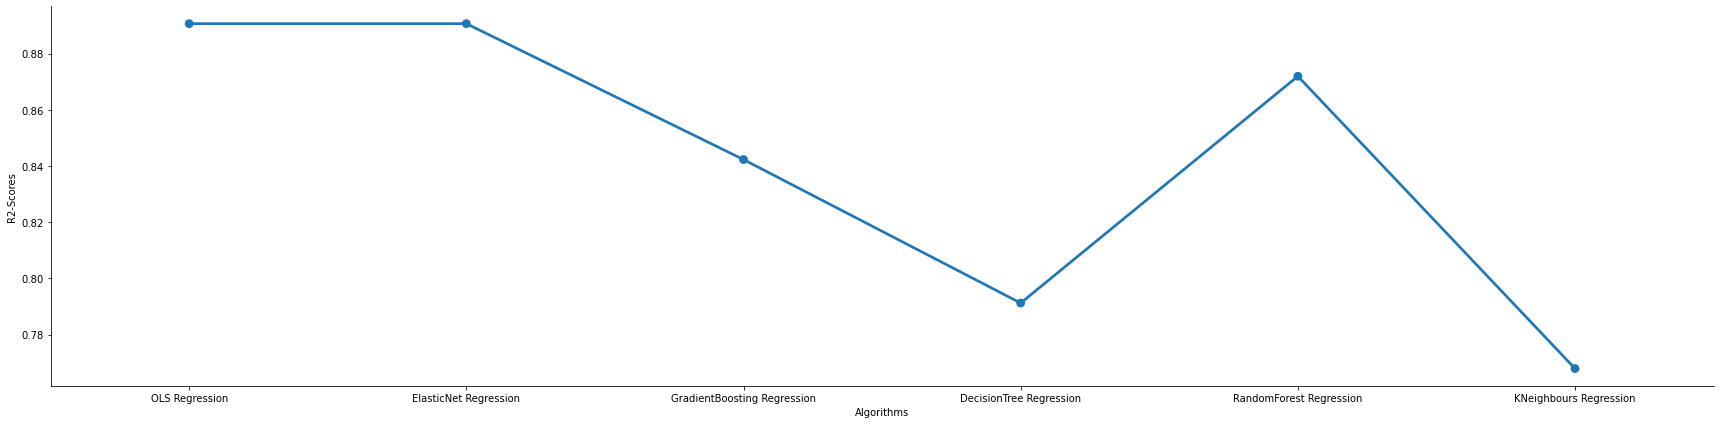

In [272]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

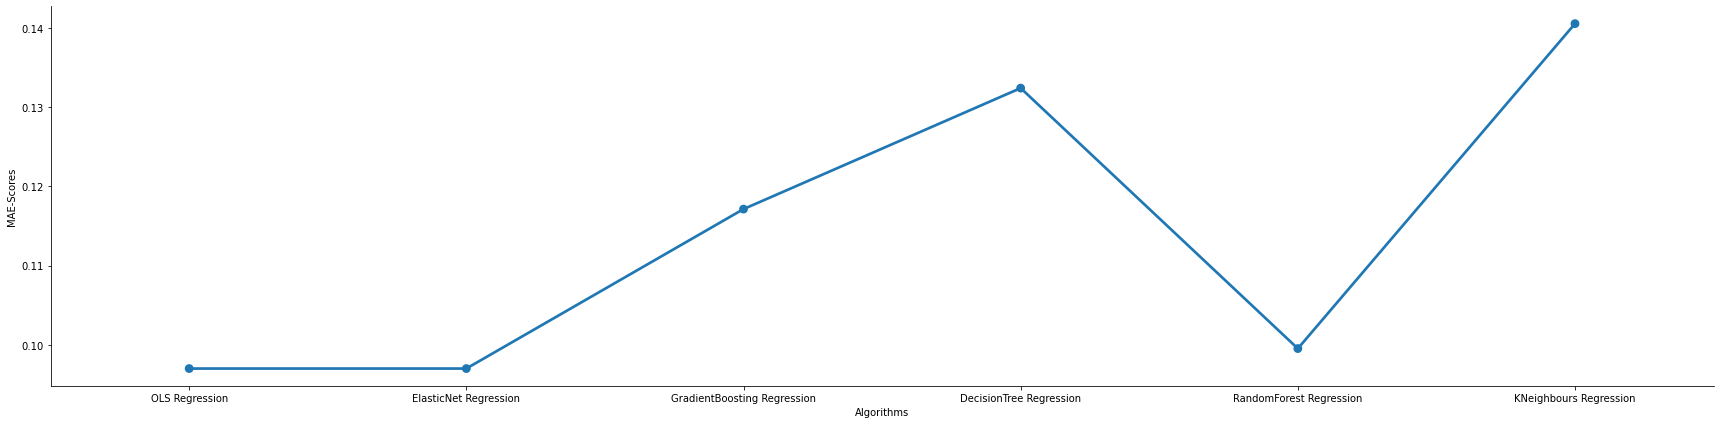

In [273]:
sns.factorplot(x='Algorithms', y='MAE-Scores', data=compare, size=6 , aspect=4)

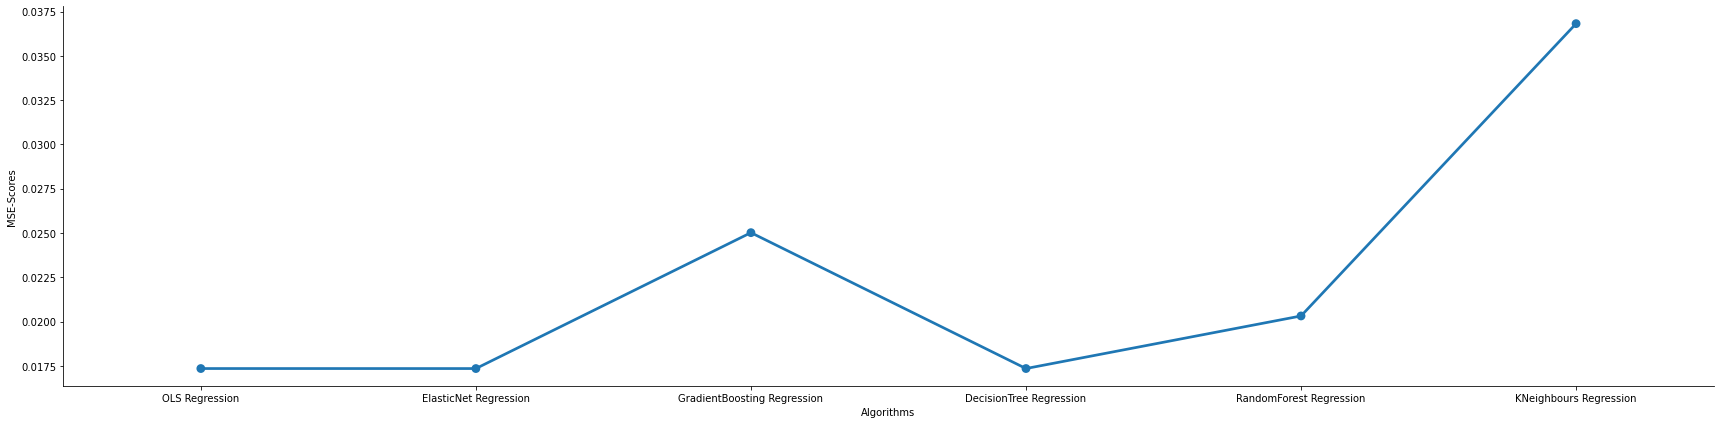

In [274]:
sns.factorplot(x='Algorithms', y='MSE-Scores', data=compare, size=6 , aspect=4)

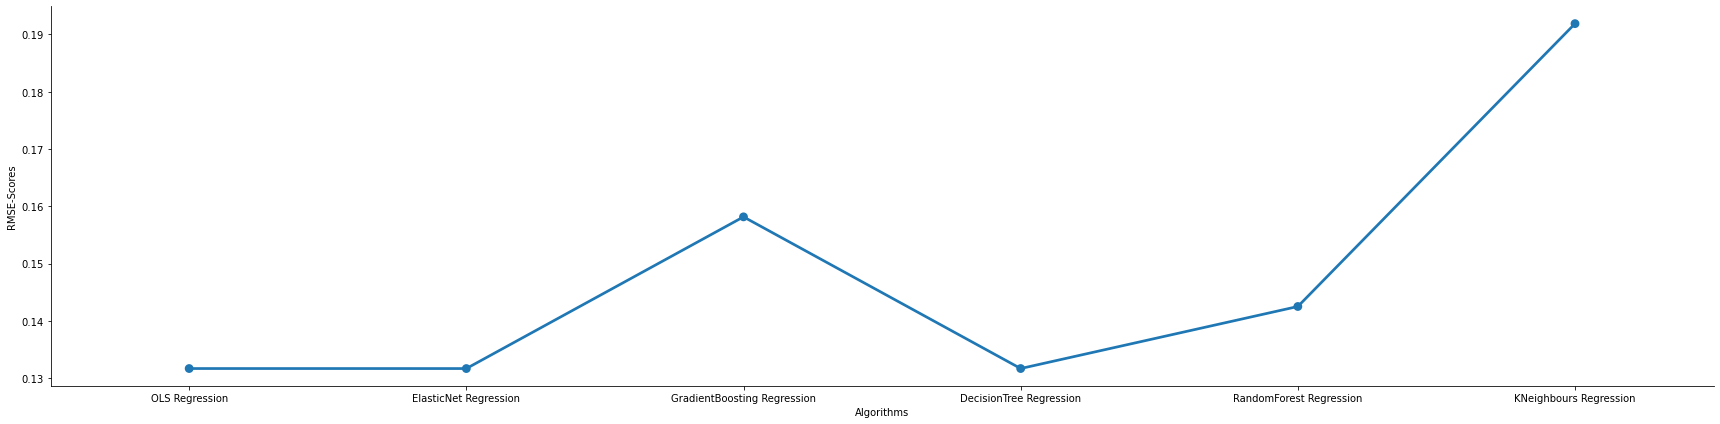

In [275]:
sns.factorplot(x='Algorithms', y='RMSE-Scores', data=compare, size=6 , aspect=4)

### Summary, Conclusions, 

So what now? How will any of this information be useful to our clients that are looking to buy or sell a home for the right price? <br> 

OLS WINS!!! <br>
Pros:
- OLS provides clear communication on feature relevance to the customers
- It is fast <br>

Cons:
- It can be influenced by multicollinearity, resulting in overfitting the model
- In the age of machine learning, linear regression isn't the "shiny new toy". Investors in products that rely on OLS might look elsewhere for more exciting models.

Let's break down the models since they are fresh in our minds. The graph above displays that the best models are the ElasticNet, OLS, and RandomForest (in descending order of scores). <br> These models could likely be tweeked with parameter changes or even selecting different features to train the model. However, no matter the case, we need to think about our target audience and weigh the cost/benefit of the product.<br>

Cutting to the chase, OLS will do the job for this data set in a powerful way. Not only is it basically tied for first place for accuracy but it also has a handy dandy summary table that allows us to tell a story with the features inside the model. When shopping for homes, people tend to care about the specifics of a home, i.e. size, location, number of bathrooms, etc... more importantly, how those features effect the value of the home. Buyers and sellers are constantly running "comps" in the areas they are most interested in purchasing a home. <br>
Take neighborhoods, for instance. Reviewing the summary table, we can see that the "StoneBr" neighborhood has a positive relationship with SalePrice. Converserly, "MeadowV" reflects a negative relationship with SalePrice. This can give our customers the information to help guide them which properties might just be a good value for their pocket book. <br>

Without going too far down the rabbit hole, the OLS summary confirms some anecdotal observations about home value. Bigger homes with fireplaces, central air, multiple car garages, and rest in a culdusac trend on the pricier side of the data. There are also many other features that we might not typically consider, like roof style and siding material. Running through the feature selection process provides data scientists the means to reduce different forms of bias that might negatively impact the models. In this data set, multicollinearity was a big issue that required iterative efforts to remedy. It was also very difficult to delete certain features because of personal bias on the importance of that information. <br>

Don't get me wrong. The other supervised learning models are powerful tools, and in many cases, can outshine OLS. However, customers need tangable data they can use to justify making hefty purchases, which can be easily communicated using OLS.